# Analysis of Kepler mission lightcurves

### Agostini Federico, Bottaro Federico, Chimenti Alberto, Pompeo Gianmarco <a class="tocSkip">

#### Master Degree in Physics of Data, Padua <a class="tocSkip">


In this study, we will be performing some autoregressive modeling analysis on two datasets containing measures about two Kepler stars. In particular, these are lightcurves, containing values of light luminosity as a function of time. Our final goal is to clean our time series in order to be able to infer whether there are any exoplanets orbiting around the stars.

As a main reference, we will be using the paper by Caceres et al. (2019)
> https://arxiv.org/abs/1901.08003

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#a)-Provide-basic-information-about-the-lightcurves" data-toc-modified-id="a)-Provide-basic-information-about-the-lightcurves-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>a) Provide basic information about the lightcurves</a></span><ul class="toc-item"><li><span><a href="#Kepler-1" data-toc-modified-id="Kepler-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Kepler 1</a></span></li><li><span><a href="#Kepler-2" data-toc-modified-id="Kepler-2-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Kepler 2</a></span></li></ul></li><li><span><a href="#b)-Smooth-lightcurves,-with-confidence-bands,-and-interpolate-gaps" data-toc-modified-id="b)-Smooth-lightcurves,-with-confidence-bands,-and-interpolate-gaps-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>b) Smooth lightcurves, with confidence bands, and interpolate gaps</a></span><ul class="toc-item"><li><span><a href="#Kepler-1" data-toc-modified-id="Kepler-1-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Kepler 1</a></span><ul class="toc-item"><li><span><a href="#LOESS" data-toc-modified-id="LOESS-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>LOESS</a></span></li><li><span><a href="#COBS" data-toc-modified-id="COBS-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>COBS</a></span></li><li><span><a href="#LOCFIT" data-toc-modified-id="LOCFIT-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>LOCFIT</a></span></li><li><span><a href="#KALMAN" data-toc-modified-id="KALMAN-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>KALMAN</a></span></li><li><span><a href="#Summary-of-statistichal-methods" data-toc-modified-id="Summary-of-statistichal-methods-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Summary of statistichal methods</a></span></li></ul></li><li><span><a href="#Kepler-2" data-toc-modified-id="Kepler-2-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Kepler 2</a></span><ul class="toc-item"><li><span><a href="#LOESS" data-toc-modified-id="LOESS-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>LOESS</a></span></li><li><span><a href="#COBS" data-toc-modified-id="COBS-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>COBS</a></span></li><li><span><a href="#LOCFIT" data-toc-modified-id="LOCFIT-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>LOCFIT</a></span></li><li><span><a href="#KALMAN" data-toc-modified-id="KALMAN-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>KALMAN</a></span></li><li><span><a href="#Summary-of-statistichal-methods" data-toc-modified-id="Summary-of-statistichal-methods-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>Summary of statistichal methods</a></span></li></ul></li></ul></li><li><span><a href="#c)-ARIMA-modeling" data-toc-modified-id="c)-ARIMA-modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>c) ARIMA modeling</a></span><ul class="toc-item"><li><span><a href="#Kepler-1" data-toc-modified-id="Kepler-1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Kepler 1</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Differencing" data-toc-modified-id="Differencing-3.1.0.1"><span class="toc-item-num">3.1.0.1&nbsp;&nbsp;</span>Differencing</a></span></li><li><span><a href="#ARIMA" data-toc-modified-id="ARIMA-3.1.0.2"><span class="toc-item-num">3.1.0.2&nbsp;&nbsp;</span>ARIMA</a></span></li><li><span><a href="#Auto-ARIMA" data-toc-modified-id="Auto-ARIMA-3.1.0.3"><span class="toc-item-num">3.1.0.3&nbsp;&nbsp;</span>Auto ARIMA</a></span></li><li><span><a href="#Residuals-autocorrelation-tests" data-toc-modified-id="Residuals-autocorrelation-tests-3.1.0.4"><span class="toc-item-num">3.1.0.4&nbsp;&nbsp;</span>Residuals autocorrelation tests</a></span></li><li><span><a href="#Residuals-stationarity-test" data-toc-modified-id="Residuals-stationarity-test-3.1.0.5"><span class="toc-item-num">3.1.0.5&nbsp;&nbsp;</span>Residuals stationarity test</a></span></li></ul></li></ul></li><li><span><a href="#Kepler-2" data-toc-modified-id="Kepler-2-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Kepler 2</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Differencing" data-toc-modified-id="Differencing-3.2.0.1"><span class="toc-item-num">3.2.0.1&nbsp;&nbsp;</span>Differencing</a></span></li><li><span><a href="#ARIMA" data-toc-modified-id="ARIMA-3.2.0.2"><span class="toc-item-num">3.2.0.2&nbsp;&nbsp;</span>ARIMA</a></span></li><li><span><a href="#Auto-ARIMA" data-toc-modified-id="Auto-ARIMA-3.2.0.3"><span class="toc-item-num">3.2.0.3&nbsp;&nbsp;</span>Auto ARIMA</a></span></li><li><span><a href="#Residuals-autocorrelation-tests" data-toc-modified-id="Residuals-autocorrelation-tests-3.2.0.4"><span class="toc-item-num">3.2.0.4&nbsp;&nbsp;</span>Residuals autocorrelation tests</a></span></li><li><span><a href="#Residuals-stationarity-test" data-toc-modified-id="Residuals-stationarity-test-3.2.0.5"><span class="toc-item-num">3.2.0.5&nbsp;&nbsp;</span>Residuals stationarity test</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#d)-Periodicity-search" data-toc-modified-id="d)-Periodicity-search-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>d) Periodicity search</a></span><ul class="toc-item"><li><span><a href="#Kepler-1" data-toc-modified-id="Kepler-1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Kepler 1</a></span></li><li><span><a href="#Kepler-2" data-toc-modified-id="Kepler-2-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Kepler 2</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

In [1]:
# load library
# library(stats)    # standard statistics library in R
                    # quantiles, IQR, Box-Pierce test, acf, pacf, LOESS, arima
library(lmtest)     # Durbin-Watson test
library(tseries)    # Augmented Dickey-Fuller test
library(nortest)    # Andreson-Darling test
library(cobs)       # COBS
library(locfit)     # locfit
library(imputeTS)   # NA imputation
library(forecast)   # Auto arima
library(RobPer)     # Periodicity search
library(lomb)       # Periodicity search
library(wavethresh) # Noise suppression
library(waveslim)   # Noise detection


Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

locfit 1.5-9.1 	 2013-03-22

Attaching package: ‘imputeTS’

The following object is masked from ‘package:tseries’:

    na.remove

The following object is masked from ‘package:zoo’:

    na.locf

Loading required package: robustbase
Loading required package: quantreg
Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve

Loading required package: splines
Loading required package: BB
Loading required package: rgenoud
##  rgenoud (Version 5.8-3.0, Build Date: 2019-01-22)
##  See http://sekhon.berkeley.edu/rgenoud for additional documentation.
##  Please cite software as:
##   Walter Mebane, Jr. and Jasjeet S. Sekhon. 2011.
##   ``Genetic Optimization Using Derivatives: The rgenoud package for R.''
##   Journal of Statistical Software, 42(11): 1-26. 
##

Loading required p

## a) Provide basic information about the lightcurves 
**Length, NA fraction, IQR and other quantiles, autocorrelation function, and time series diagnostics (Ljung-Box, Durbin-Watson, augmented Dickey-Fuller, Anderson-Darling tests).**

We have two distinct datasets related to two Kepler stars which we will conventionally name Kepler 1 and Kepler 2. As a general summary, the datasets contain 71,427 rows but about 16\% and 29\% of them respectively have `NA` values and hence need to be dealt with using a variety of R's techniques. We also retrieve some basic statistical quantities to have a more definite portrayal of our datasets.

We then compute the autocorrelation function and perform a variety of statistical tests related to time series diagnostics, which we summarize at the end of this Section in order to be able to comment on the values obtained hereafter.

In [2]:
Presentation <- function(data, name){
    # basic information about the dataset, along with some plots
    
    options(repr.plot.width = 7.5, repr.plot.height = 10)
    # basic information about the dataset, along with Time Series plot and histogram
    cat('------>',name,'\n')
    # plot
    par(mfrow=c(4,1)); par(mar=c(5,4,3,2))
    plot(data, type='l', xlab='Time', main=name)
    # histogram
    hist(data, freq=FALSE, breaks=200, main='', xlab='Values')
    # Autocorrelation
    acf (data, na.action=na.pass, xlab='Lag', main='') 
    # Partial Autocorrelation
    pacf (data, na.action=na.pass, xlab='Lag', main='')
    #dataset length
    cat("Length =", length(data), "\n")
    # NA percentage
    cat("NA percentage =", length(which(is.na(data))) / length(data), "\n")}

In [3]:
TS.diagnostic <- function(data, name){
    # function to perform Time Series Diagnostics:
    #   - quantiles and IQR
    #   - Autocorrelation (ACF and PACF with plots)
    #   - Tests: Box-Piers, Durbin-Watson, augmented Dickey-Fuller, Andrson-Darling
    
    time      <- 1:length(data)
    cat('------>',name,'\n')
    # Quantiles
    cat('---------------------------------------------\n')
    cat('\t Quantiles = \n')
    cat(quantile(data, na.rm=TRUE), '\n\n')

    # IQR
    cat('InterQuartile Range = ', IQR(data, na.rm=TRUE), '\n\n')
    
    # Box-Ljung -> autocorrelation != 0
    cat('---------------------------------------------\n')
    print(Box.test(data, type='Ljung', lag=1))
    
    # Durbin-Watson -> autocorrelation in residuals
    cat('---------------------------------------------\n')
    print(dwtest(data~time))

    # augmented Dickey-Fuller Test -> stationarity
    cat('---------------------------------------------\n')
    print(adf.test(na.omit  (data), alternative='stationary'), prefix="[Omitting NA]  ")
    print(adf.test(na.kalman(data), alternative='stationary'), prefix="[Imputing NA]  ")

    # Anderson-Darling Test -> normality
    cat('---------------------------------------------\n')
    print(ad.test(data))
}

### Kepler 1

------> Kepler 1 
Length = 71427 
NA percentage = 0.1587215 


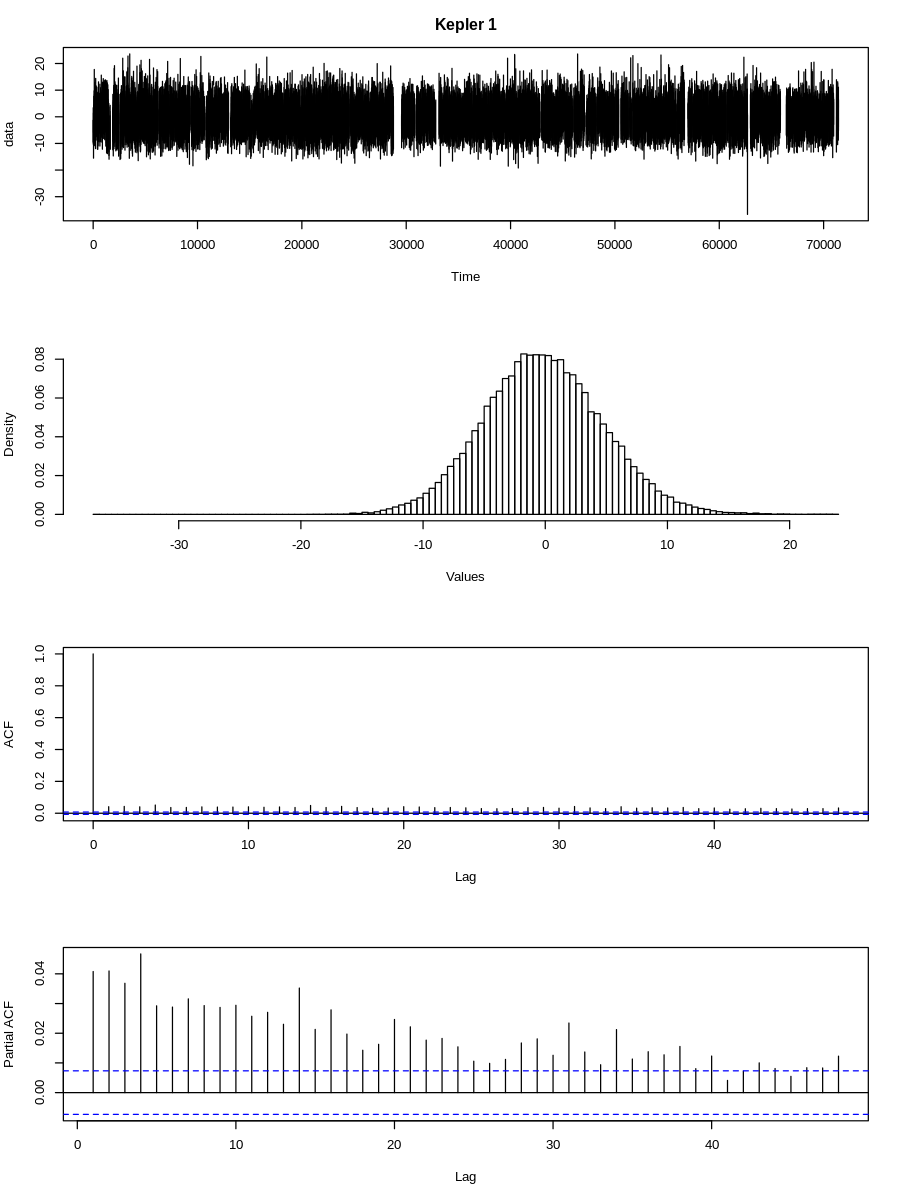

In [4]:
# load the dataset, and create the corresponding time vector
Kepler1 <- read.table('Kepler1.dat')[[1]]
time1   <- 1:length(Kepler1)
# keep an instance without NA
Kepler1.noNA <- Kepler1[!is.na(Kepler1)]
time1.noNA   <-   time1[!is.na(Kepler1)]
Presentation(Kepler1, "Kepler 1")


In [5]:
TS.diagnostic(Kepler1, "Kepler 1")

------> Kepler 1 
---------------------------------------------
	 Quantiles = 
-36.64253 -3.448259 -0.2644167 3.028062 23.59968 

InterQuartile Range =  6.476321 

---------------------------------------------

	Box-Ljung test

data:  data
X-squared = 99.95, df = 1, p-value < 2.2e-16

---------------------------------------------

	Durbin-Watson test

data:  data ~ time
DW = 1.9139, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0

---------------------------------------------


Warning message in adf.test(na.omit(data), alternative = "stationary"):
“p-value smaller than printed p-value”


[Omitting NA]  Augmented Dickey-Fuller Test

data:  na.omit(data)
Dickey-Fuller = -25.833, Lag order = 39, p-value = 0.01
alternative hypothesis: stationary



Warning message in adf.test(na.kalman(data), alternative = "stationary"):
“p-value smaller than printed p-value”


[Imputing NA]  Augmented Dickey-Fuller Test

data:  na.kalman(data)
Dickey-Fuller = -24.737, Lag order = 41, p-value = 0.01
alternative hypothesis: stationary

---------------------------------------------

	Anderson-Darling normality test

data:  data
A = 13.393, p-value < 2.2e-16



We will comment these results after the Kepler 2 section, so as to be able to compare and contrast the two datasets.

### Kepler 2

------> Kepler 2 
Length = 71427 
NA percentage = 0.2883783 


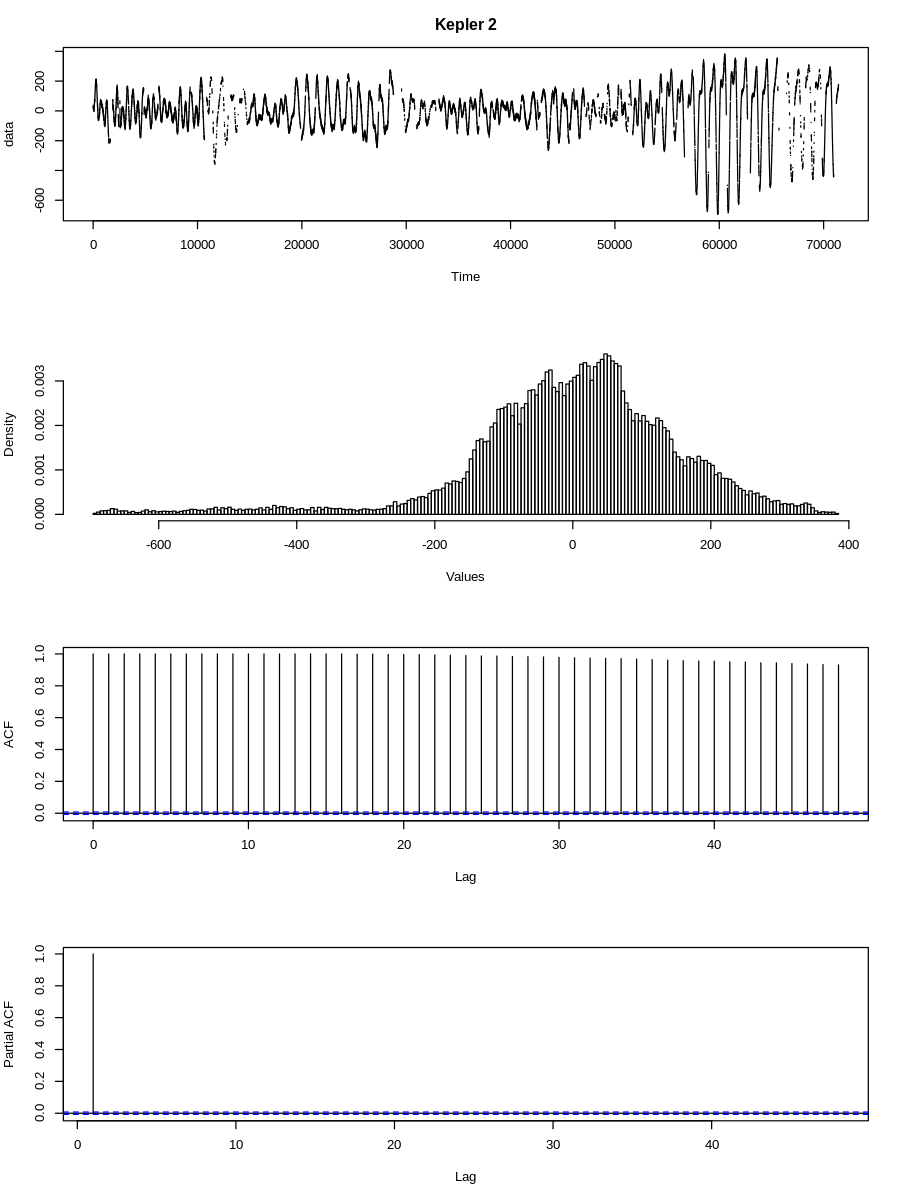

In [6]:
# load the dataset, and create the corresponding time vector
Kepler2 <- read.table('Kepler2.dat')[[1]]
time2   <- 1:length(Kepler2)
# keep an instance without NA
Kepler2.noNA <- Kepler2[!is.na(Kepler2)]
time2.noNA   <-   time2[!is.na(Kepler2)]
Presentation(Kepler2, "Kepler 2")


In [7]:
TS.diagnostic(Kepler2, "Kepler 2")

------> Kepler 2 
---------------------------------------------
	 Quantiles = 
-694.9032 -75.46426 11.45456 90.87998 382.4952 

InterQuartile Range =  166.3442 

---------------------------------------------

	Box-Ljung test

data:  data
X-squared = 50832, df = 1, p-value < 2.2e-16

---------------------------------------------

	Durbin-Watson test

data:  data ~ time
DW = 0.0042916, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0

---------------------------------------------


Warning message in adf.test(na.omit(data), alternative = "stationary"):
“p-value smaller than printed p-value”


[Omitting NA]  Augmented Dickey-Fuller Test

data:  na.omit(data)
Dickey-Fuller = -13.125, Lag order = 37, p-value = 0.01
alternative hypothesis: stationary



Warning message in StructTS(data, ...):
“possible convergence problem: 'optim' gave code = 52 and message ‘ERROR: ABNORMAL_TERMINATION_IN_LNSRCH’”Warning message in adf.test(na.kalman(data), alternative = "stationary"):
“p-value smaller than printed p-value”


[Imputing NA]  Augmented Dickey-Fuller Test

data:  na.kalman(data)
Dickey-Fuller = -24.22, Lag order = 41, p-value = 0.01
alternative hypothesis: stationary

---------------------------------------------

	Anderson-Darling normality test

data:  data
A = 583.17, p-value < 2.2e-16



As a general overview, we can see that Kepler 1 has a noticeably lower percentage of `NA` compared to Kepler 2 (about 15.9\% versus 28.8\%). The plots of the two time series show that Kepler 2 has a much cleaner trend, where we can distinguish a clear sinusoidal shape with varying amplitude; Kepler 1 shows very dense spikes that at this time of the analysis are hardly distinguishable. The fact that the first dataset is very noisy seems to be also confirmed by the histogram showing the distribution of such luminosity values: in Kepler 1, the shape is a pretty clear gaussian (and we know noise is gaussian-distributed because of its randomness), while Kepler 2 does show some more complex structures.

As far as the autocorrelation is concerned (ACF and Partial-ACF, which also takes into account the linear effects of intermediate observations), in Kepler 1 we see that the values are in general much lower (by a factor 10), even if also here almost all of them are outside the interval defined by the dashed lines. This is absolutely coherent with the fact that Kepler 1 is noisier than Kepler 2: in general, the more autocorrelated the values are, the less random we expect our time series to be. 

---

We now describe the statistical tests we have performed and the results obtained.

- **Ljung-Box test**, used to check if any group of autocorrelations in a time series is different from 0, taking as null hypothesis that the data is i.i.d. (identically and independently distributed). According to the literature, however, this test is only meaningful after an ARIMA model has been used to fit the series, therefore we will disregard its results at this time. 

- **Durbin-Watson test**, which is employed to check if residuals in a regression analysis show autocorrelation; in particular, a value close to 0 signals positive autocorrelation, one close to 2 lack of autocorrelation, while a number closer to 4 hints at a negative autocorrelation. In this section however, we performed the test directly on the data; the results obtained are $DW_1 = 1.914$ and  $DW_2 = 0.004$. In light of this element we can say that Kepler 1 shows no autocorrelation, while Kepler 2 definitely shows a positive one.

- **Augmented Dickey-Fuller test**, used to verify whether a unit root is present in a time series sample; the alternative hypothesis is the stationarity of our time series. With this many observations and with such negative values for both the stars considered, we can reject the null hypothesis and hence conclude this process is a stationary one.

- **Anderson-Darling normality test**, performed to verify whether a certain sample is drawn from a normal distribution. In our instance, neither $\mu$ nor $\sigma$ are known, so we retrieve them from the data; for both Kepler 1 and 2 we can reject the normality hypothesis at any significance level since we obtain values of $A^2$ that are way beyond the theoretical critical values $A^{\star}$. Nevertheless we have that the value of this parameter for Kepler 1 is one order of magnitude smaller than $A^2$ for Kepler 2; this is because looking at the distribution of the data we can see that Kepler 1 is quite more gaussian shaped than Kepler 2.


## b) Smooth lightcurves, with confidence bands, and interpolate gaps
**Try LOESS, COBS, locfit, and
imputeTS. Calculate residuals from a smoothed function with time series diagnostics.**

### Kepler 1

#### LOESS

The `LOESS` function is heavily dependent on the choice of the `span` parameter, that indicates the degree of smoothing of the fitting function. In particular, we need to choose it in order to have a representative trend of the data, without overfitting. We present a graphical view of the fitting with three different values of `span`, but we only perform Time Series analyses for the value `0.1`, because the other ones seem to overfit. This choice is also motivated by the results obtained with different tests, in particular `COBS` and `ARIMA`, that are shown later in the notebook.

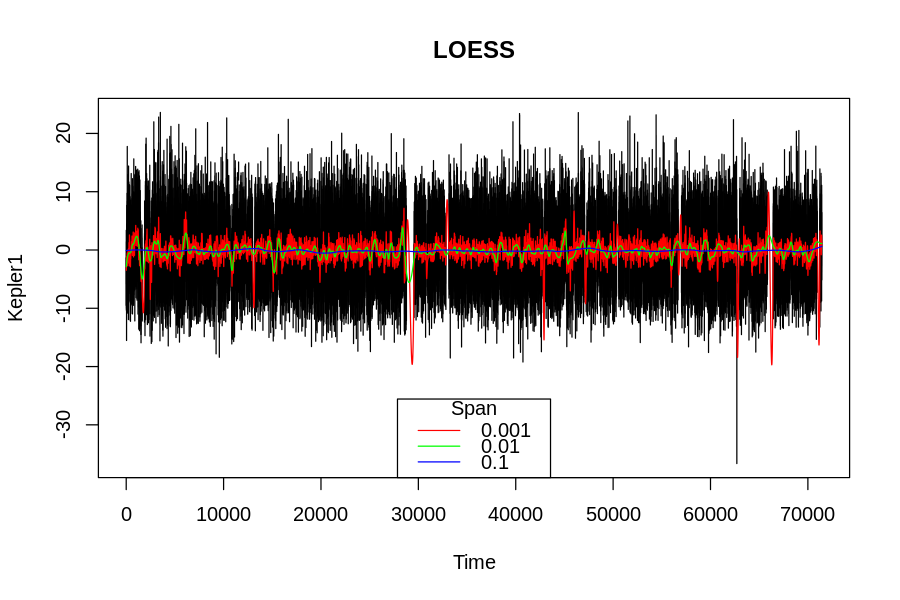

In [8]:
options(repr.plot.width = 7.5, repr.plot.height = 5)
span.list = c(0.001, 0.01, 0.1)
col.list  = c("red", "green", "blue")
Kepler1.loess.0 <- loess(Kepler1.noNA ~ time1.noNA, data=data.frame(x=time1.noNA, y=Kepler1.noNA), span=span.list[[1]])
Kepler1.loess.1 <- loess(Kepler1.noNA ~ time1.noNA, data=data.frame(x=time1.noNA, y=Kepler1.noNA), span=span.list[[2]])
Kepler1.loess.2 <- loess(Kepler1.noNA ~ time1.noNA, data=data.frame(x=time1.noNA, y=Kepler1.noNA), span=span.list[[3]])

plot(Kepler1, xlab="Time", type="l", main="LOESS")
lines(time1, predict(Kepler1.loess.0, newdata=time1), col=col.list[[1]])
lines(time1, predict(Kepler1.loess.1, newdata=time1), col=col.list[[2]])
lines(time1, predict(Kepler1.loess.2, newdata=time1), col=col.list[[3]])
legend(legend=span.list, x="bottom", lty=1, col=col.list, title="Span")


---------------------------------------------
	 Span =  0.1 
---------------------------------------------


Call:
loess(formula = Kepler1.noNA ~ time1.noNA, data = data.frame(x = time1.noNA, 
    y = Kepler1.noNA), span = span.list[[3]])

Number of Observations: 60090 
Equivalent Number of Parameters: 28.72 
Residual Standard Error: 4.911 
Trace of smoother matrix: 31.76  (exact)

Control settings:
  span     :  0.1 
  degree   :  2 
  family   :  gaussian
  surface  :  interpolate	  cell = 0.2
  normalize:  TRUE
 parametric:  FALSE
drop.square:  FALSE 

------> Residuals 
---------------------------------------------
	 Quantiles = 
-36.45766 -3.306422 -0.1120305 3.17563 23.91788 

InterQuartile Range =  6.482052 

---------------------------------------------

	Box-Ljung test

data:  data
X-squared = 104.02, df = 1, p-value < 2.2e-16

---------------------------------------------

	Durbin-Watson test

data:  data ~ time
DW = 1.9168, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0

---------------------------------------------


Warning message in adf.test(na.omit(data), alternative = "stationary"):
“p-value smaller than printed p-value”


[Omitting NA]  Augmented Dickey-Fuller Test

data:  na.omit(data)
Dickey-Fuller = -26.167, Lag order = 39, p-value = 0.01
alternative hypothesis: stationary



Warning message in adf.test(na.kalman(data), alternative = "stationary"):
“p-value smaller than printed p-value”


[Imputing NA]  Augmented Dickey-Fuller Test

data:  na.kalman(data)
Dickey-Fuller = -26.167, Lag order = 39, p-value = 0.01
alternative hypothesis: stationary

---------------------------------------------

	Anderson-Darling normality test

data:  data
A = 13.923, p-value < 2.2e-16



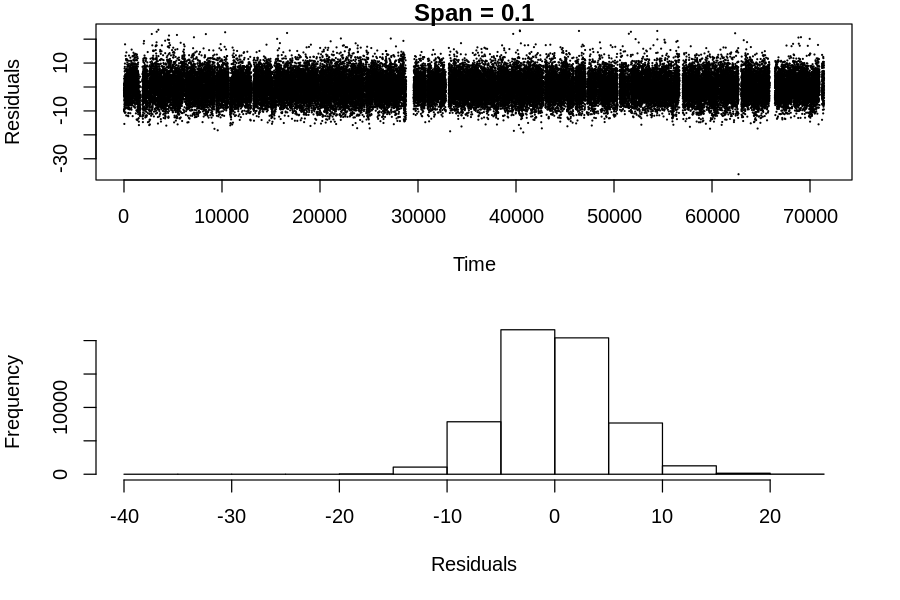

In [9]:
cat('---------------------------------------------\n')
cat('\t Span = ', span.list[3], '\n')
cat('---------------------------------------------\n')

summary(Kepler1.loess.2)

residuals.2 <- Kepler1.loess.2$residuals

par(mfrow=c(2,1)); par(mar=c(5,4,1,2))
plot(time1.noNA, residuals.2, cex=0.1, xlab="Time", ylab="Residuals", main="Span = 0.1")
hist(residuals.2, xlab="Residuals", main="")
TS.diagnostic(residuals.2, "Residuals")

#### COBS

The COnstrained B-Splines nonparametric regression provides an automatic method for model selection, which in this case depends on the choice of the knots for spline fitting.

qbsks2():
 Performing general knot selection ...

 Deleting unnecessary knots ...
qbsks2():
 Performing general knot selection ...

 Deleting unnecessary knots ...
qbsks2():
 Performing general knot selection ...

 Deleting unnecessary knots ...
COBS regression spline (degree = 2) from call:
	 cobs(x = time1.noNA, y = Kepler1.noNA, method = "quantile", ic = "BIC")
{tau=0.5}-quantile;  dimensionality of fit: 3 from {3}
x$knots[1:2]:     0.928574, 71427.071426
coef[1:3]: -0.2011109, -0.4441878, -0.1311267
R^2 = -0.05% ;  empirical tau (over all): 30045/60090 = 0.5 (target tau= 0.5)


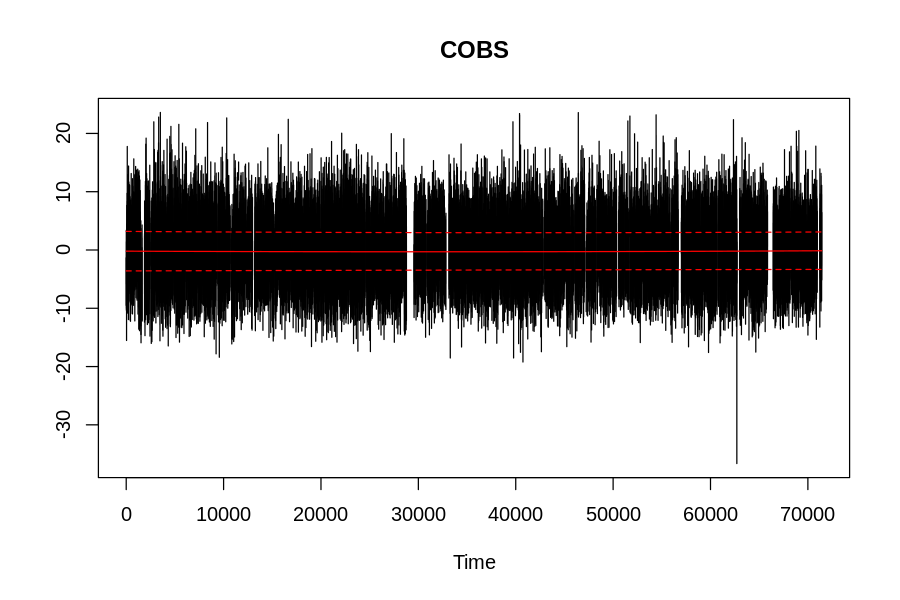

In [10]:
options(repr.plot.width = 7.5, repr.plot.height = 5)
Kepler1.cobs    <- cobs(time1.noNA, Kepler1.noNA, method='quantile', ic="BIC")
Kepler1.cobs.25 <- cobs(time1.noNA, Kepler1.noNA, method='quantile', ic="BIC", tau=0.25)
Kepler1.cobs.75 <- cobs(time1.noNA, Kepler1.noNA, method='quantile', ic="BIC", tau=0.75)
summary(Kepler1.cobs)
plot(Kepler1, type="l", xlab="Time", ylab="", main="COBS")
lines(sort(Kepler1.cobs$x), Kepler1.cobs$fitted[order(Kepler1.cobs$x)], col="red")
lines(sort(Kepler1.cobs.25$x), Kepler1.cobs.25$fitted[order(Kepler1.cobs.25$x)], col="red", lty=2)
lines(sort(Kepler1.cobs.75$x), Kepler1.cobs.75$fitted[order(Kepler1.cobs.75$x)], col="red", lty=2)


------> Residuals 
---------------------------------------------
	 Quantiles = 
-36.44324 -3.186958 3.747003e-16 3.286462 23.85357 

InterQuartile Range =  6.47342 

---------------------------------------------

	Box-Ljung test

data:  data
X-squared = 111.17, df = 1, p-value < 2.2e-16

---------------------------------------------

	Durbin-Watson test

data:  data ~ time
DW = 1.914, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0

---------------------------------------------


Warning message in adf.test(na.omit(data), alternative = "stationary"):
“p-value smaller than printed p-value”


[Omitting NA]  Augmented Dickey-Fuller Test

data:  na.omit(data)
Dickey-Fuller = -25.844, Lag order = 39, p-value = 0.01
alternative hypothesis: stationary



Warning message in adf.test(na.kalman(data), alternative = "stationary"):
“p-value smaller than printed p-value”


[Imputing NA]  Augmented Dickey-Fuller Test

data:  na.kalman(data)
Dickey-Fuller = -25.844, Lag order = 39, p-value = 0.01
alternative hypothesis: stationary

---------------------------------------------

	Anderson-Darling normality test

data:  data
A = 13.373, p-value < 2.2e-16



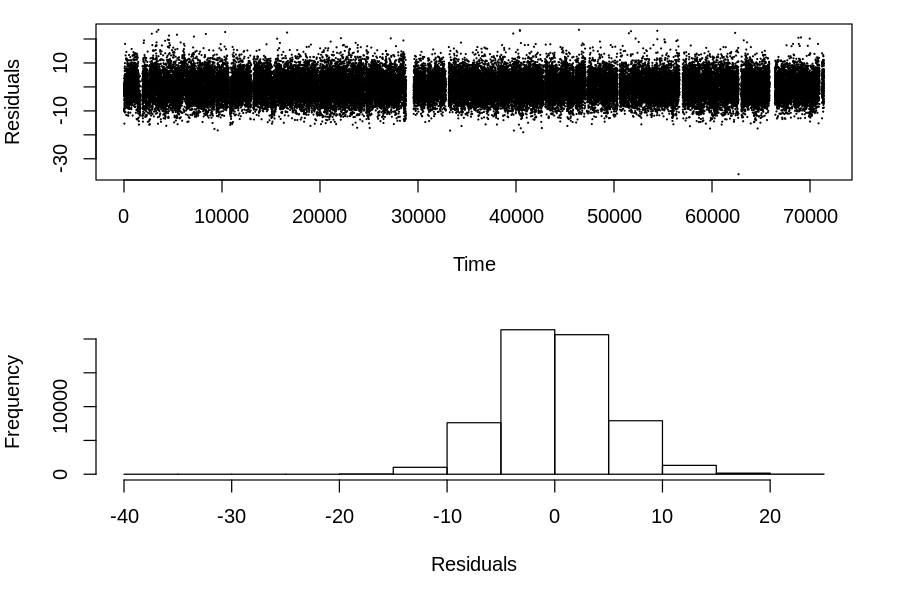

In [11]:
residuals <- Kepler1.cobs$resid
par(mfrow=c(2,1)); par(mar=c(5,4,1,2))
plot(time1.noNA, residuals, cex=0.1, xlab="Time", ylab="Residuals")
hist(residuals, xlab="Residuals", main="")
TS.diagnostic(residuals, "Residuals")

As we can see from the results, the automatic model selection brings us to the oversimplified choice of only two "useful" knots.
The distribution of the knots is chosen by the algorithm according to percentiles distribution in the chosen subset up to a maximum of 6 knots.

Such a method leads us to a smoothed static lightcurve which highlights the fact that the Kepler 1 dataset is full of noise.

#### LOCFIT

This LOCal regression method uses kernel density estimation over provided subset selection.
In this case the parameter which discriminates the result is `nn` in the `lp` method. Similarly to `LOESS` span, it defines the range to consider the "nearest neighbor" of a point for fitting. As before, we present the plot with two different values of the parameter, whereas the deeper analyses is done for `nn = 0.1`, due to the fact that it seems not to overfit.

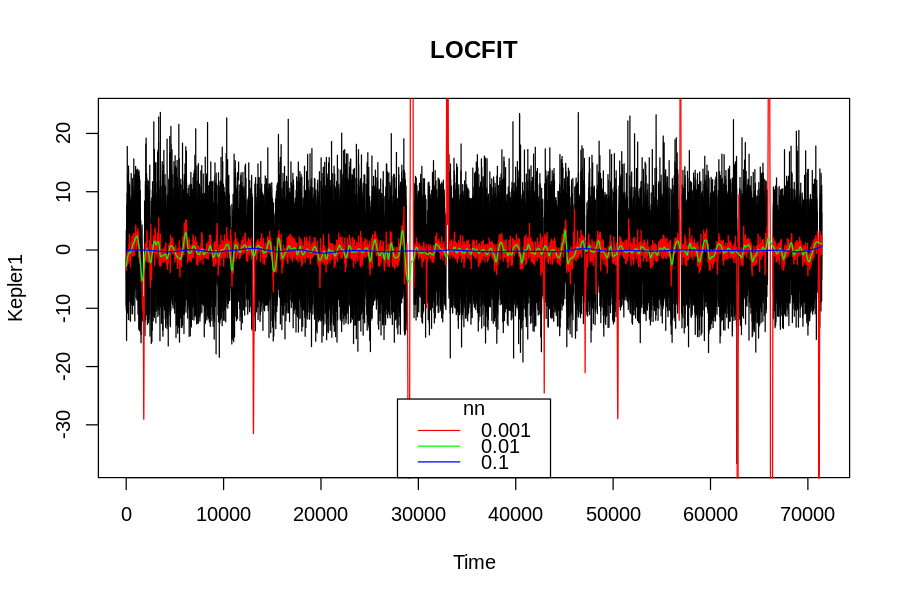

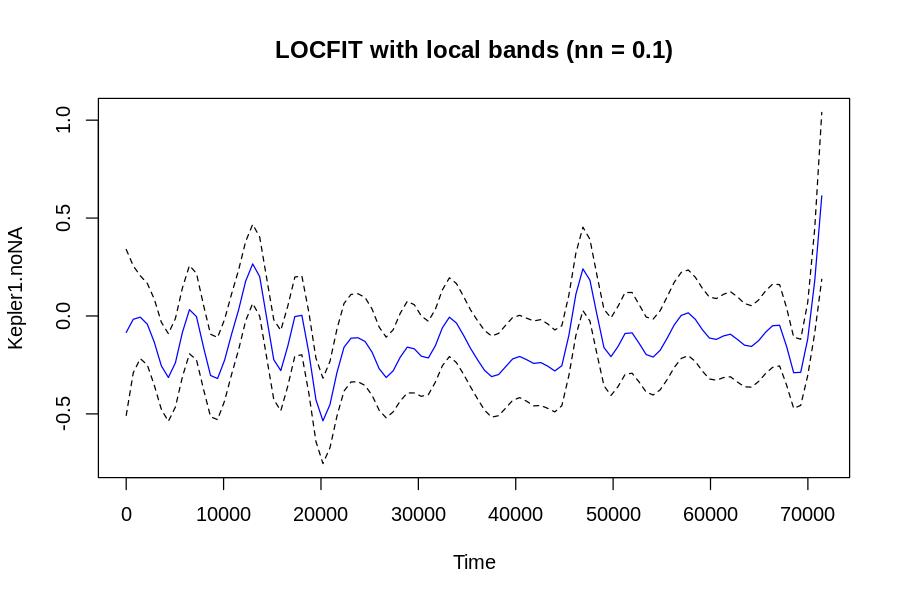

In [12]:
options(repr.plot.width = 7.5, repr.plot.height = 5)
nn.list   = c(0.001, 0.01, 0.1)
col.list  = c("red", "green", "blue")
Kepler1.locfit.0 <- locfit(Kepler1.noNA~lp(time1.noNA, nn=nn.list[[1]]))
Kepler1.locfit.1 <- locfit(Kepler1.noNA~lp(time1.noNA, nn=nn.list[[2]]))
Kepler1.locfit.2 <- locfit(Kepler1.noNA~lp(time1.noNA, nn=nn.list[[3]]))
plot(Kepler1, xlab="Time", type="l", main="LOCFIT")
lines(time1, predict(Kepler1.locfit.0,newdata=time1), col=col.list[[1]])
lines(time1, predict(Kepler1.locfit.1,newdata=time1), col=col.list[[2]])
lines(time1, predict(Kepler1.locfit.2,newdata=time1), col=col.list[[3]])
legend(legend=nn.list, x="bottom", lty=1, col=col.list, title="nn")
plot(Kepler1.locfit.2, band="local", xlab="Time", main="LOCFIT with local bands (nn = 0.1)", col=col.list[[3]])


---------------------------------------------
	 nn =  0.1 
---------------------------------------------


Estimation type: Local Regression 

Call:
locfit(formula = Kepler1.noNA ~ lp(time1.noNA, nn = nn.list[[3]]))

Number of data points:  60090 
Independent variables:  time1.noNA 
Evaluation structure: Rectangular Tree 
Number of evaluation points:  33 
Degree of fit:  2 
Fitted Degrees of Freedom:  29.242 

------> Residuals 
---------------------------------------------
	 Quantiles = 
-36.52574 -3.321432 -0.1275151 3.163202 23.83867 

InterQuartile Range =  6.484635 

---------------------------------------------

	Box-Ljung test

data:  data
X-squared = 104.35, df = 1, p-value < 2.2e-16

---------------------------------------------

	Durbin-Watson test

data:  data ~ time
DW = 1.9167, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0

---------------------------------------------


Warning message in adf.test(na.omit(data), alternative = "stationary"):
“p-value smaller than printed p-value”


[Omitting NA]  Augmented Dickey-Fuller Test

data:  na.omit(data)
Dickey-Fuller = -26.149, Lag order = 39, p-value = 0.01
alternative hypothesis: stationary



Warning message in adf.test(na.kalman(data), alternative = "stationary"):
“p-value smaller than printed p-value”


[Imputing NA]  Augmented Dickey-Fuller Test

data:  na.kalman(data)
Dickey-Fuller = -26.149, Lag order = 39, p-value = 0.01
alternative hypothesis: stationary

---------------------------------------------

	Anderson-Darling normality test

data:  data
A = 13.82, p-value < 2.2e-16



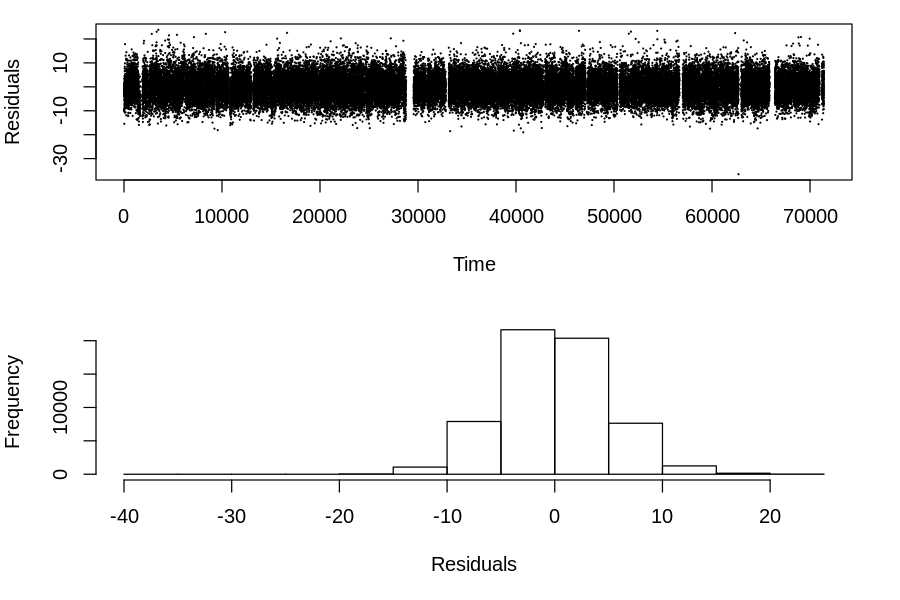

In [13]:
cat('---------------------------------------------\n')
cat('\t nn = ', nn.list[3], '\n')
cat('---------------------------------------------\n')
residuals <- Kepler1.noNA - predict(Kepler1.locfit.2, newdata=time1.noNA)
summary(Kepler1.locfit.2)
par(mfrow=c(2,1)); par(mar=c(5,4,1,2))
plot(time1.noNA, residuals, cex=0.1, xlab="Time", ylab="Residuals")
hist(residuals, xlab="Residuals", main="")
TS.diagnostic(residuals, "Residuals")

#### KALMAN

The `imputeTS` library implements some prediction methods when the dataset presents missing observations (the `NA` values). In particular, we apply the Kalman Smoothing to deal with missing values for Kepler 1. 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-36.6425  -2.8732  -0.2792  -0.1831   2.3644  23.5997 

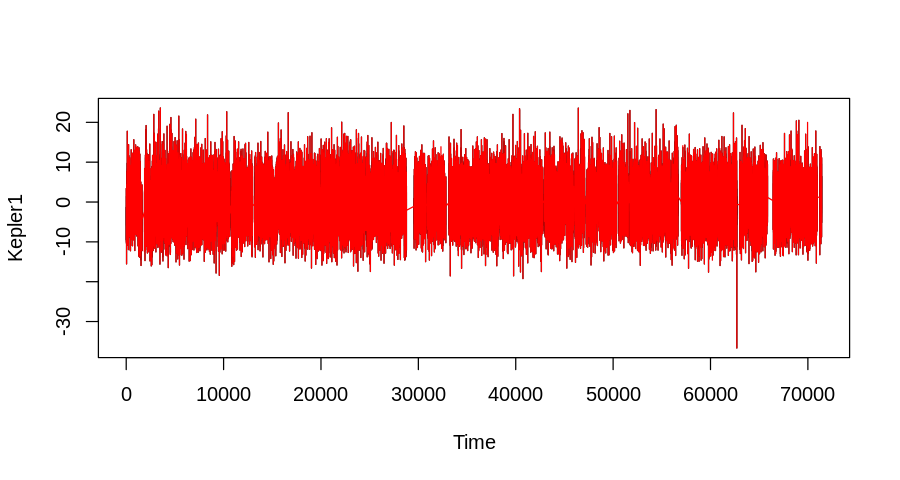

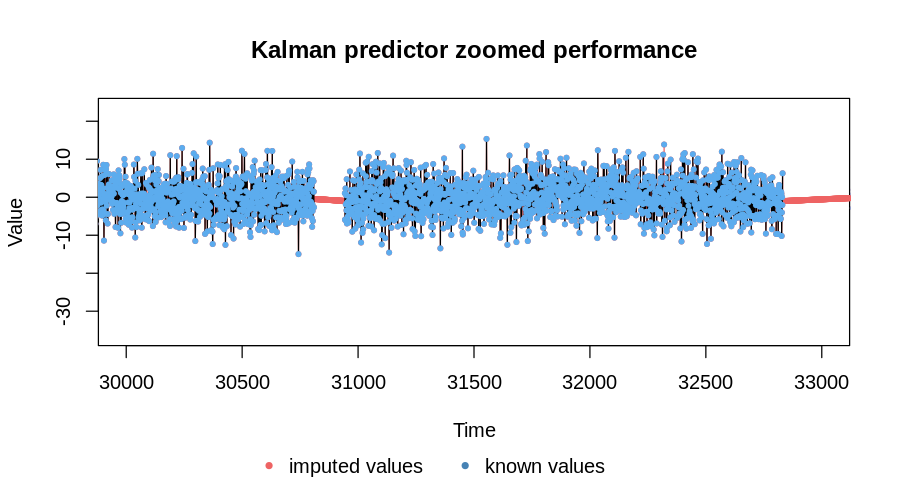

In [14]:
options(repr.plot.width = 7.5, repr.plot.height = 4)
Kepler1.kalman <- na.kalman(Kepler1)
summary(Kepler1.kalman)
plot(Kepler1, xlab="Time", type="l")
lines(Kepler1.kalman, col="red", type="l", lty=1)
plotNA.imputations(Kepler1, Kepler1.kalman, xlim=c(30000,33000), main='Kalman predictor zoomed performance')

We decided to use `kalman` as a forecasting method and the results reported above show that the algorithm does not follow the trend when it needs to fill the gaps and impute `NA`. In light of the previous fitting method, this is not unexpected: in fact, there is no clear trend in the dataset, but it looks like noise, without a clear signal.

---

As a final comment, all the tests seem to agree to the fact that the Kepler 1 time series is largely made by noise. Therefore, one could consider to repeat the TS analysis just performed using a filtered sample instead of the original data. The filtering procedure is shown in the *Periodicity search* section; also the noise suppression analyses reports a constant signal around zero, without any noticeable trend.

#### Summary of statistichal methods


Test               | No fit            | Loess     | Cobs    | Locfit 
---                | ---               | ---       |  ---    | ---
IQR                |6.48               |   6.48    | 6.47    |6.48
Box-Ljung          |99.95              |   104.02  | 111.10   |104.35
Durbin-Watson      |1.91               |   1.92    | 1.91    |1.92
Augmented DF       |-25.83             |   -26.17 | -25.84  |-26.15
Anderson-Darling   |13.39              |   13.93   | 13.37   |13.82

All the p-values for the various methods are $\leqslant 0.01$, therefore these values are all reliable.

In agreement with the fact that Kepler 1 is for the most part made by noise, it is not surprising that in the table above all the values are more or less the same before and after performing each statistical method. This is because the methods recognize the noise and the fits are almost a straight line on 0. For this reason the residuals that we are testing is more or less the data itself. What has been said in section _Provide basic information about the lightcurves_ holds also for the residuals of the various smoothing procedures.

### Kepler 2

#### LOESS

Similarly to the analysis perfected on Kepler 1, the fitting is performed using 3 different values of `span`. In this case, we choose the value of `0.001` as the best one; Kepler 2 shows a clearer trend than the previous dataset, and the model with `s = 0.001` follows it more closely than the others. This model prediction reproduces at best the quasi-periodic oscillating component in the data gaps.

Finally, an higher `span = 0.1` totally dumps the high-amplitude quasi-periodic variations.

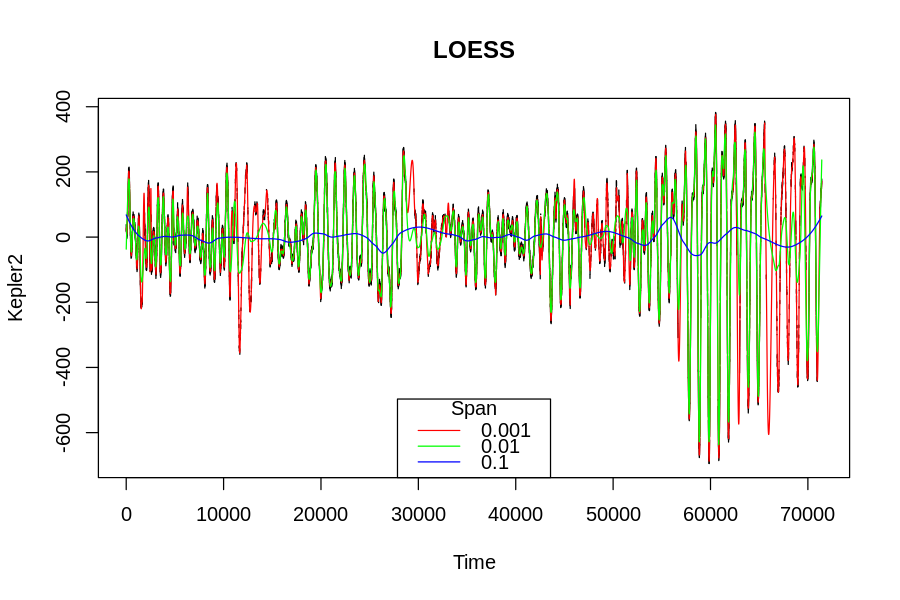

In [15]:
options(repr.plot.width = 7.5, repr.plot.height = 5)
span.list = c(0.001, 0.01, 0.1)
col.list  = c("red", "green", "blue")
Kepler2.loess.0 <- loess(Kepler2.noNA ~ time2.noNA, data=data.frame(x=time2.noNA, y=Kepler2.noNA), span=span.list[[1]])
Kepler2.loess.1 <- loess(Kepler2.noNA ~ time2.noNA, data=data.frame(x=time2.noNA, y=Kepler2.noNA), span=span.list[[2]])
Kepler2.loess.2 <- loess(Kepler2.noNA ~ time2.noNA, data=data.frame(x=time2.noNA, y=Kepler2.noNA), span=span.list[[3]])

plot(Kepler2, xlab="Time", type="l", main="LOESS")
lines(time2, predict(Kepler2.loess.0, newdata=time2), col=col.list[[1]])
lines(time2, predict(Kepler2.loess.1, newdata=time2), col=col.list[[2]])
lines(time2, predict(Kepler2.loess.2, newdata=time2), col=col.list[[3]])
legend(legend=span.list, x="bottom", lty=1, col=col.list, title="Span")


---------------------------------------------
	 Span =  0.001 
---------------------------------------------


Call:
loess(formula = Kepler2.noNA ~ time2.noNA, data = data.frame(x = time2.noNA, 
    y = Kepler2.noNA), span = span.list[[1]])

Number of Observations: 50829 
Equivalent Number of Parameters: 3078.13 
Residual Standard Error: 5.729 
Trace of smoother matrix: 3245.42  (exact)

Control settings:
  span     :  0.001 
  degree   :  2 
  family   :  gaussian
  surface  :  interpolate	  cell = 0.2
  normalize:  TRUE
 parametric:  FALSE
drop.square:  FALSE 

------> Residuals 
---------------------------------------------
	 Quantiles = 
-50.43704 -3.684587 -0.07617568 3.580074 29.97921 

InterQuartile Range =  7.264661 

---------------------------------------------

	Box-Ljung test

data:  data
X-squared = 59.344, df = 1, p-value = 1.321e-14

---------------------------------------------

	Durbin-Watson test

data:  data ~ time
DW = 2.0683, p-value = 1
alternative hypothesis: true autocorrelation is greater than 0

---------------------------------------------


Warning message in adf.test(na.omit(data), alternative = "stationary"):
“p-value smaller than printed p-value”


[Omitting NA]  Augmented Dickey-Fuller Test

data:  na.omit(data)
Dickey-Fuller = -53.405, Lag order = 37, p-value = 0.01
alternative hypothesis: stationary



Warning message in adf.test(na.kalman(data), alternative = "stationary"):
“p-value smaller than printed p-value”


[Imputing NA]  Augmented Dickey-Fuller Test

data:  na.kalman(data)
Dickey-Fuller = -53.405, Lag order = 37, p-value = 0.01
alternative hypothesis: stationary

---------------------------------------------

	Anderson-Darling normality test

data:  data
A = 12.769, p-value < 2.2e-16



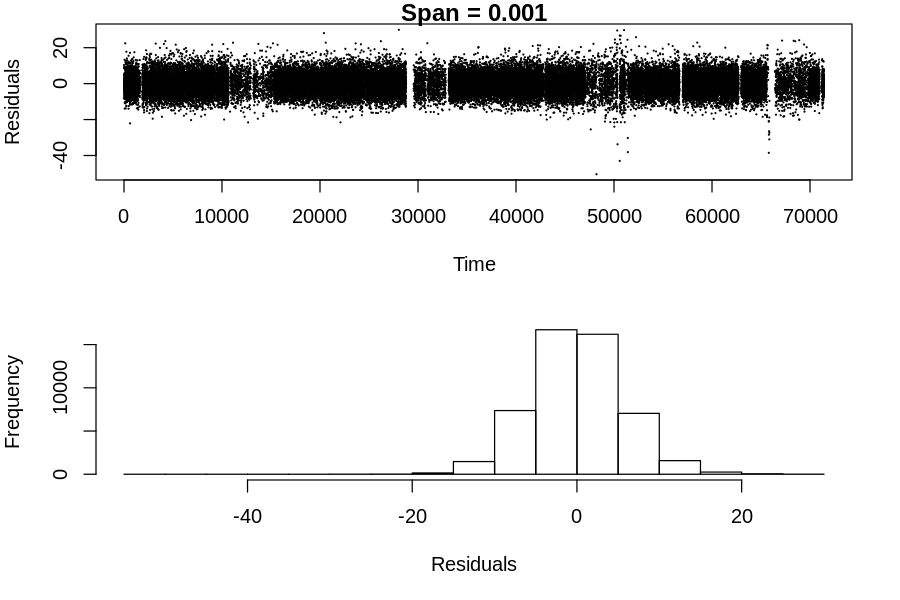

In [16]:
cat('---------------------------------------------\n')
cat('\t Span = ', span.list[1], '\n')
cat('---------------------------------------------\n')

summary(Kepler2.loess.0)

residuals.0 <- Kepler2.loess.0$residuals

par(mfrow=c(2,1)); par(mar=c(5,4,1,2))
plot(time2.noNA, residuals.0, cex=0.1, xlab="Time", ylab="Residuals", main="Span = 0.001")
hist(residuals.0, xlab="Residuals", main="")
TS.diagnostic(residuals.0, "Residuals")

#### COBS

qbsks2():
 Performing general knot selection ...

 Deleting unnecessary knots ...
qbsks2():
 Performing general knot selection ...

 WARNING! Since the number of  20  knots selected by  BIC  reached the
   upper bound during general knot selection, you might want to rerun
   cobs with a larger number of knots. 

 Deleting unnecessary knots ...

 WARNING! Since the number of  20  knots selected by  BIC  reached the
   upper bound during general knot selection, you might want to rerun
   cobs with a larger number of knots. 
qbsks2():
 Performing general knot selection ...

 Deleting unnecessary knots ...


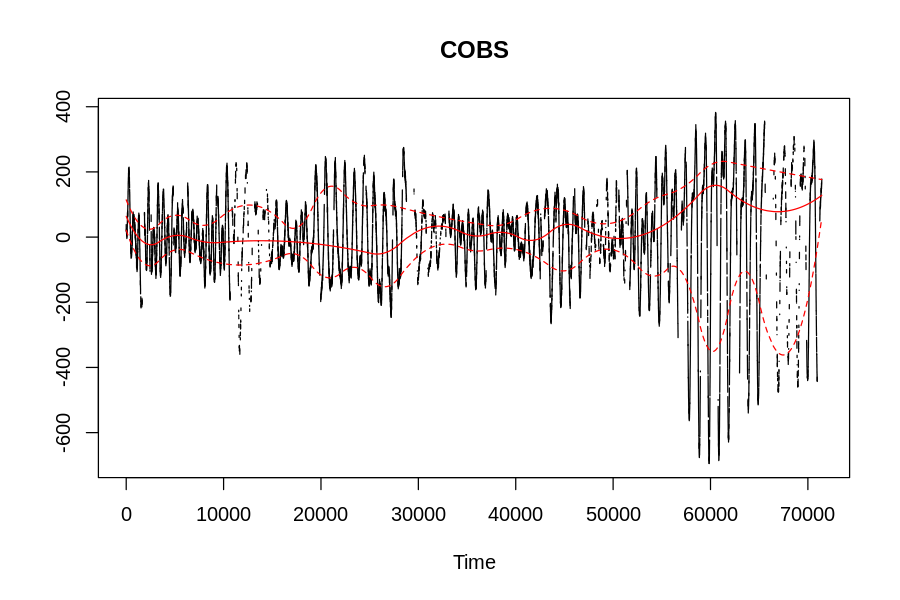

In [17]:
options(repr.plot.width = 7.5, repr.plot.height = 5)
Kepler2.cobs    <- cobs(time2, Kepler2, ic="BIC", nknots=20)
Kepler2.cobs.25 <- cobs(time2, Kepler2, ic="BIC", nknots=20, tau=0.25)
Kepler2.cobs.75 <- cobs(time2, Kepler2, ic="BIC", nknots=20, tau=0.75)
plot(Kepler2, type="l", xlab="Time", ylab="", main="COBS")
lines(sort(Kepler2.cobs$x), Kepler2.cobs$fitted[order(Kepler2.cobs$x)], col="red")
lines(sort(Kepler2.cobs.25$x), Kepler2.cobs.25$fitted[order(Kepler2.cobs.25$x)], col="red", lty=2)
lines(sort(Kepler2.cobs.75$x), Kepler2.cobs.75$fitted[order(Kepler2.cobs.75$x)], col="red", lty=2)


COBS regression spline (degree = 2) from call:
	 cobs(x = time2, y = Kepler2, nknots = 20, ic = "BIC")
{tau=0.5}-quantile;  dimensionality of fit: 15 from {15}
x$knots[1:14]:     0.928574,  3344.000000,  6495.000000, ... , 71427.071426
coef[1:15]:  63.617653, -50.082826,  17.437167, -20.649753,   3.390965, ... , 128.246877
R^2 = -13.51% ;  empirical tau (over all): 25414/50829 = 0.4999902 (target tau= 0.5)
------> Residuals 
---------------------------------------------
	 Quantiles = 
-849.5099 -71.09392 1.24345e-14 67.49143 296.3027 

InterQuartile Range =  138.5854 

---------------------------------------------

	Box-Ljung test

data:  data
X-squared = 50637, df = 1, p-value < 2.2e-16

---------------------------------------------

	Durbin-Watson test

data:  data ~ time
DW = 0.0040705, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0

---------------------------------------------


Warning message in adf.test(na.omit(data), alternative = "stationary"):
“p-value smaller than printed p-value”


[Omitting NA]  Augmented Dickey-Fuller Test

data:  na.omit(data)
Dickey-Fuller = -12.792, Lag order = 37, p-value = 0.01
alternative hypothesis: stationary



Warning message in adf.test(na.kalman(data), alternative = "stationary"):
“p-value smaller than printed p-value”


[Imputing NA]  Augmented Dickey-Fuller Test

data:  na.kalman(data)
Dickey-Fuller = -12.792, Lag order = 37, p-value = 0.01
alternative hypothesis: stationary

---------------------------------------------

	Anderson-Darling normality test

data:  data
A = 1792.5, p-value < 2.2e-16



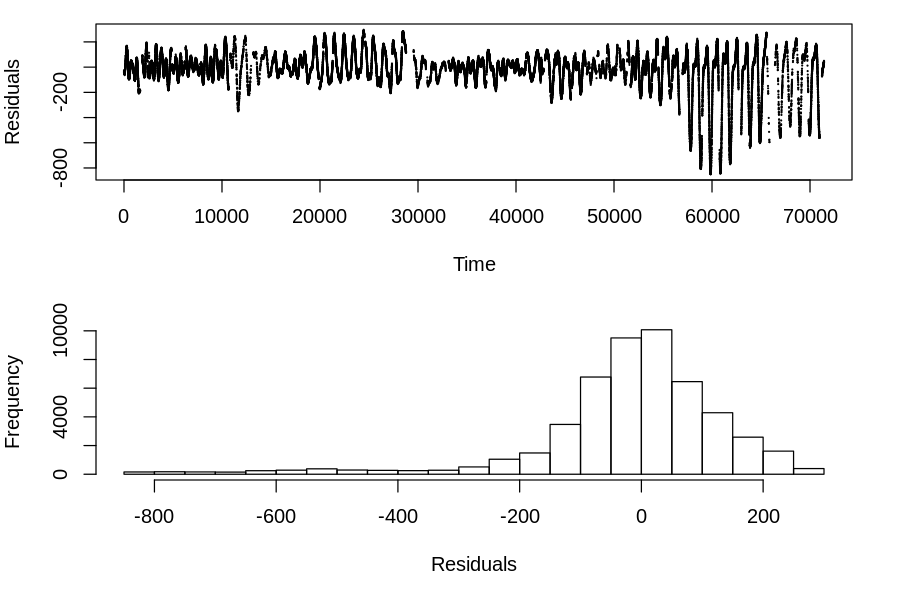

In [18]:
residuals <- Kepler2.cobs$resid
summary(Kepler2.cobs)
par(mfrow=c(2,1)); par(mar=c(5,4,1,2))
plot(time2.noNA, residuals, cex=0.1, xlab="Time", ylab="Residuals")
hist(residuals, xlab="Residuals", main="")
TS.diagnostic(residuals, "Residuals")

`COBS` totally eliminates the oscillations in the dataset; while it succeeds at giving a general idea of the underlying trend, we conclude that for Kepler 2 this approach results in missing some relevant features (i.e.: the oscillating component).

#### LOCFIT

The same discussion done for the `span` parameter of `LOESS`is valid here for the `nn` selection. It is clear that the smallest value of the `nn` parameter results in an overshooting behaviour over the time series where the missing values lie. In such a scenario, it seems reasonable to discard this value even if it is the one that follows that oscillating behaviour more closely. A slight increment to `nn=0.005` gives ideal results.

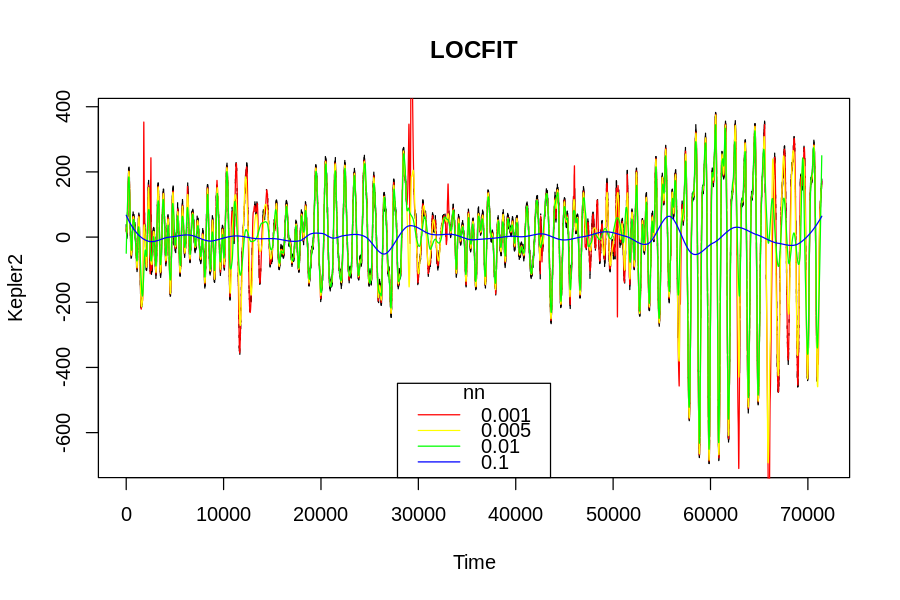

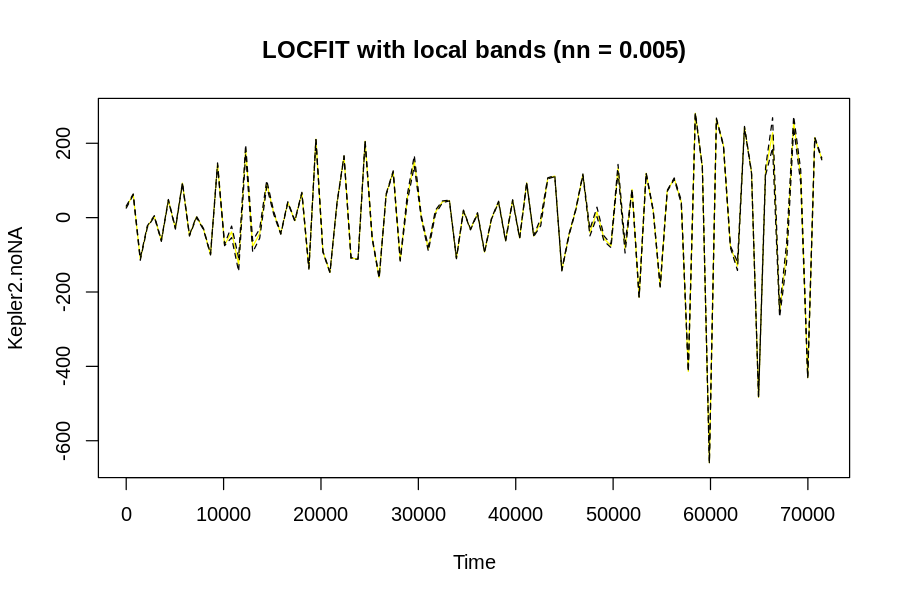

In [19]:
options(repr.plot.width = 7.5, repr.plot.height = 5)
nn.list   = c(0.001, 0.005, 0.01, 0.1)
col.list  = c("red", "yellow", "green", "blue")
Kepler2.locfit.0 <- locfit(Kepler2.noNA~lp(time2.noNA, nn=nn.list[[1]]))
Kepler2.locfit.1 <- locfit(Kepler2.noNA~lp(time2.noNA, nn=nn.list[[2]]))
Kepler2.locfit.2 <- locfit(Kepler2.noNA~lp(time2.noNA, nn=nn.list[[3]]))
Kepler2.locfit.3 <- locfit(Kepler2.noNA~lp(time2.noNA, nn=nn.list[[4]]))
plot(Kepler2, xlab="Time", type="l", main="LOCFIT")
lines(time2, predict(Kepler2.locfit.0,newdata=time2), col=col.list[[1]])
lines(time2, predict(Kepler2.locfit.1,newdata=time2), col=col.list[[2]])
lines(time2, predict(Kepler2.locfit.2,newdata=time2), col=col.list[[3]])
lines(time2, predict(Kepler2.locfit.3,newdata=time2), col=col.list[[4]])
legend(legend=nn.list, x="bottom", lty=1, col=col.list, title="nn")
plot(Kepler2.locfit.1, band="local", xlab="Time", main="LOCFIT with local bands (nn = 0.005)", col=col.list[[2]])


---------------------------------------------
	 nn =  0.005 
---------------------------------------------


Estimation type: Local Regression 

Call:
locfit(formula = Kepler2.noNA ~ lp(time2.noNA, nn = nn.list[[2]]))

Number of data points:  50829 
Independent variables:  time2.noNA 
Evaluation structure: Rectangular Tree 
Number of evaluation points:  821 
Degree of fit:  2 
Fitted Degrees of Freedom:  576.898 

------> Residuals 
---------------------------------------------
	 Quantiles = 
-166.8363 -4.684754 -0.08273919 4.59618 223.2055 

InterQuartile Range =  9.280934 

---------------------------------------------

	Box-Ljung test

data:  data
X-squared = 37932, df = 1, p-value < 2.2e-16

---------------------------------------------

	Durbin-Watson test

data:  data ~ time
DW = 0.27238, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0

---------------------------------------------


Warning message in adf.test(na.omit(data), alternative = "stationary"):
“p-value smaller than printed p-value”


[Omitting NA]  Augmented Dickey-Fuller Test

data:  na.omit(data)
Dickey-Fuller = -39.203, Lag order = 37, p-value = 0.01
alternative hypothesis: stationary



Warning message in adf.test(na.kalman(data), alternative = "stationary"):
“p-value smaller than printed p-value”


[Imputing NA]  Augmented Dickey-Fuller Test

data:  na.kalman(data)
Dickey-Fuller = -39.203, Lag order = 37, p-value = 0.01
alternative hypothesis: stationary

---------------------------------------------

	Anderson-Darling normality test

data:  data
A = 4167.8, p-value < 2.2e-16



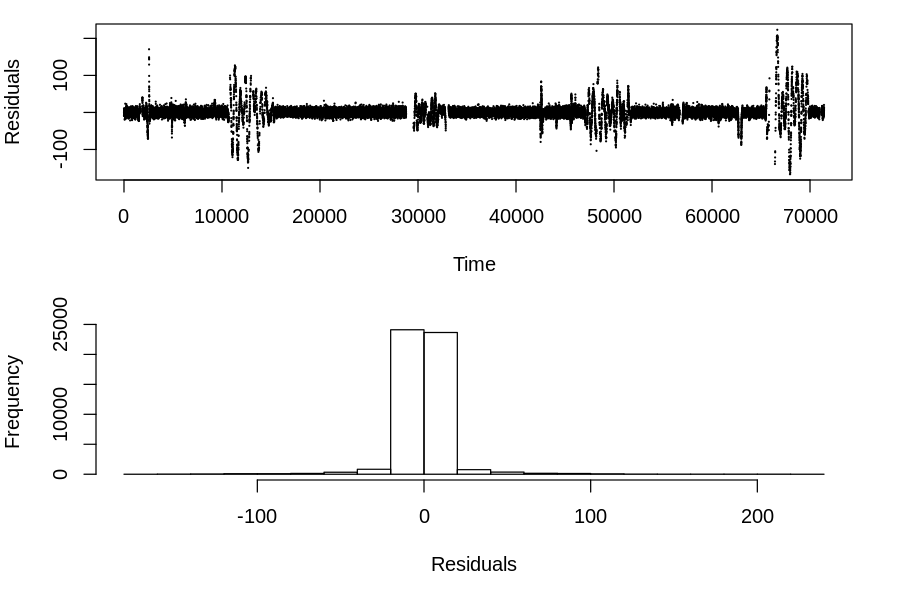

In [20]:
cat('---------------------------------------------\n')
cat('\t nn = ', nn.list[2], '\n')
cat('---------------------------------------------\n')
residuals <- Kepler2.noNA - predict(Kepler2.locfit.1, newdata=time2.noNA)
summary(Kepler2.locfit.1)
par(mfrow=c(2,1)); par(mar=c(5,4,1,2))
plot(time2.noNA, residuals, cex=0.1, xlab="Time", ylab="Residuals")
hist(residuals, xlab="Residuals", main="")
TS.diagnostic(residuals, "Residuals")


#### KALMAN

Warning message in StructTS(data, ...):
“possible convergence problem: 'optim' gave code = 52 and message ‘ERROR: ABNORMAL_TERMINATION_IN_LNSRCH’”

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-694.903  -78.388   10.733   -4.444   89.209  382.495 

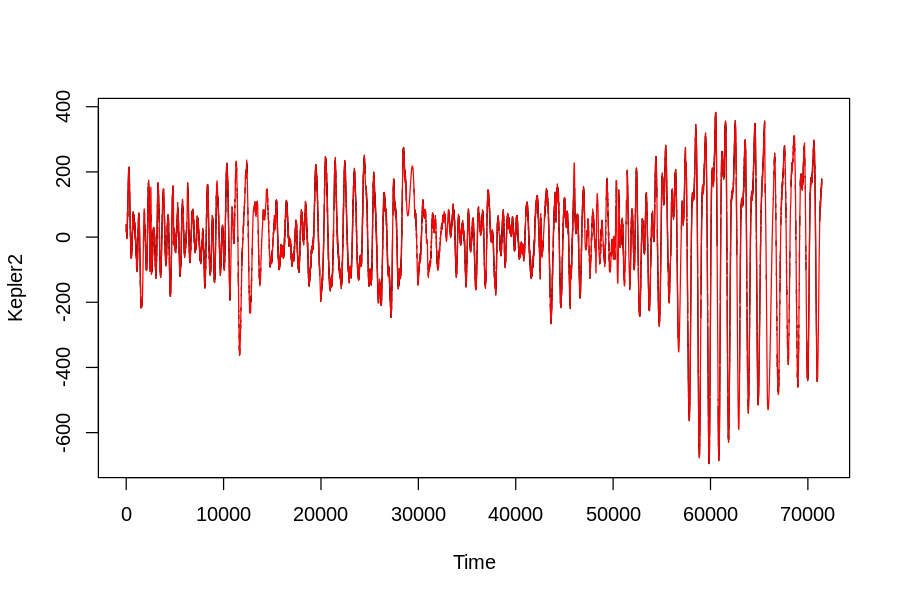

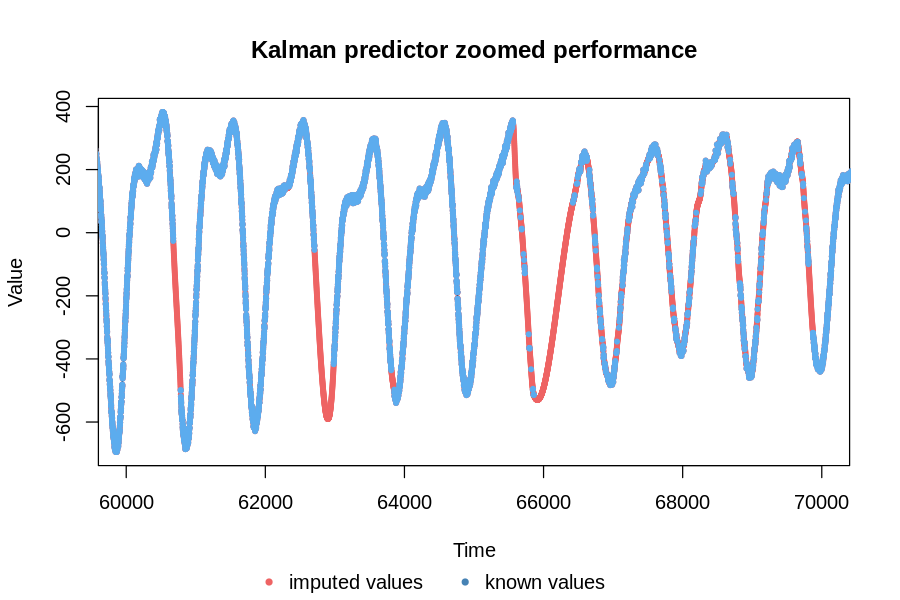

In [21]:
Kepler2.kalman <- na.kalman(Kepler2)
summary(Kepler2.kalman)
plot(Kepler2, xlab="Time", type="l")
lines(Kepler2.kalman, col="red", type="l", lty=1)
plotNA.imputations(Kepler2, Kepler2.kalman, xlim=c(60000,70000), main='Kalman predictor zoomed performance')

This time the Kalman Smooting works very well in filling `NA` gaps; in fact, it captures the behaviour of data, and replicates it even when the gaps are quite wide.

---

Concluding, Kepler 2 shows a signal, made by quasi-periodic variations; in order to learn them, we need to use smaller values for `span` (in `LOESS`) and `nn` (in `LOCFIT`), while `COBS` misses this trend. Also the noise suppression procedure that can be found later in the notebook (*Periodicity search* section), proves that there is a well defined signal without a significant noise presence. 

#### Summary of statistichal methods

Test               | No fit            | Loess     | Cobs     | Locfit 
---                | ---               | ---       |  ---     | ---
IQR                |166.34             |   7.26    | 138.59   |9.28
Box-Ljung          |50,832              |   59.34   | 50637    |37,932
Durbin-Watson      |0.004              |   2.07    | 0.004    |0.27
Augmented DF       |-24.22             |   -53.41  | -12.79   |-39.20
Anderson-Darling   |583.17             |   12.77   | 1792.5   |4,167


On Kepler 2 the situation is quite different because in this case the fits are not a line on 0. If we compare the fit obtained by `COBS` with the others we have that while `LOESS` and `LOCFIT` follow very well the high-amplitude quasi-periodic variations, `COBS` is not able to detect them, so the residuals are very similar to the data (as was the case with Kepler 1) and consequently the output of the statistical methods.

It is somewhat surprising to have a 3-order-of-magnitude difference between some of the values obtained in the statistical tests for the various methods (for example in the Box-Ljung test between `LOESS` and `LOCFIT`).

## c) ARIMA modeling
**Try individual model orders using R's arima function, and try automatic model selection
using CRAN forecast's `auto.arima (stepwise=FALSE)`. Perform time series diagnostics on the residuals.**

Through R, we can implement an ARIMA model on our time series. ARIMA stands for _autoregressive integrated moving average_ and it is defined thanks to three parameters $(p, d, q)$.

The AR(p) Auto-Regressive component describes the dependance of a given value of the time series $x_t$ from its past values,

$$x_t=a_1x_{t-1}+a_2x_{t-2}+....+a_px_{t-p}$$

The MA(q) Moving Avarage component describes the dependance of $x_t$ from the previous errors in the time-series values,

$$x_t=\epsilon_{t}+b_1\epsilon_{t-1}+b_2\epsilon_{t-2}+....+b_q\epsilon_{t-q}$$

Therefore an ARMA(p,q) model takes the following form

$$x_t=\Big(\sum_{i=1}^{p}a_iL^i\Big)x_{t}+ \Big(1+\sum_{i=1}^{p}b_iL^i\Big)\epsilon_{t}$$

where $L$ is the lag operator and $p$ and $q$ are respectively the number of lags considered for the two components.

A fundamental hypothesis which has to be fulfilled in order to perform an ARMA fitting is that the time series has to be stationary.
Here the I(d) Integrated component unveils its importance. Usually, one can "stabilize" a non-stationary TS by performing a procedure called differencing.
Such a procedure replaces the current value of $x_t$ with the difference between itself and the previous values of the time series, 

$$x_{t}'=\big(1-L\big)^dx_{t}$$

For example choosing $d=2$ means that $x_{t}'=(x_t-x_{t-1})-(x_{t-1}-x_{t-2})$

---

We perform `ARIMA` analysis following these steps: 

- as a first attempt we perform checks over the correlation in the time series in order to unveil the best possible parameters for the ARIMA method;

- also the differencing procedure will be performed in advance to check the stationarity of the model;

- we then produce a fitting attempt, based on the results obtained through differencing and autocorrelation checks, using `Arima` method. Here and afterwards we use `kalman` so as to fill the missing values in the `ARIMA` model;

- subsequently, we perform the `auto.arima` method to check the performance of the best parameters chosen through minimization of Akaike Information Criterion. The function `auto.arima` is a precious tool in R to perform automatic model selection. This function will try all possible permutations of the triplet (p, d, q) and select the best performing one according to the aforementioned criterion.

- finally, we verify the goodness of the results using time series diagnostic methods over the residuals.

### Kepler 1

##### Differencing

------> Kepler 1 
Length = 71427 
NA percentage = 0.1587215 
------> Differenced Kepler 1 


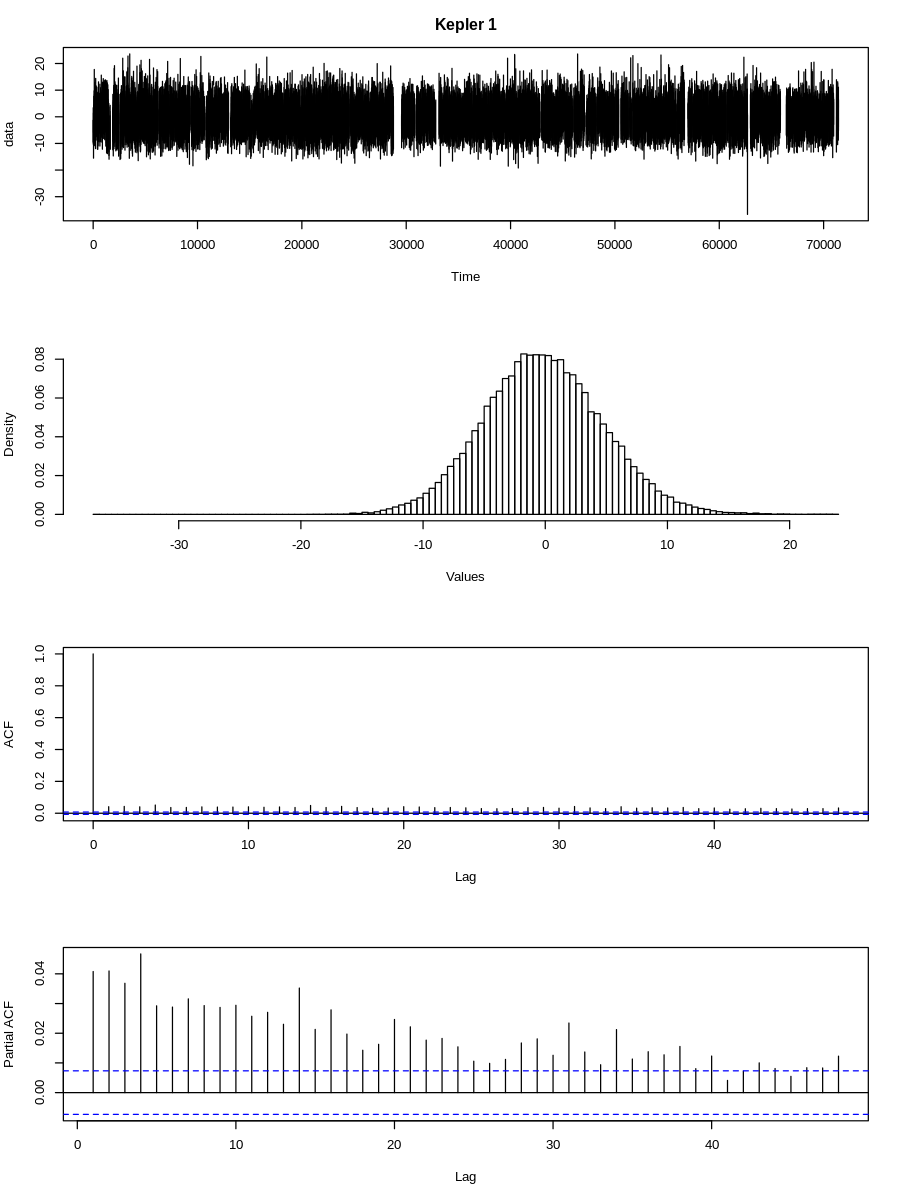

Length = 71426 
NA percentage = 0.2093215 


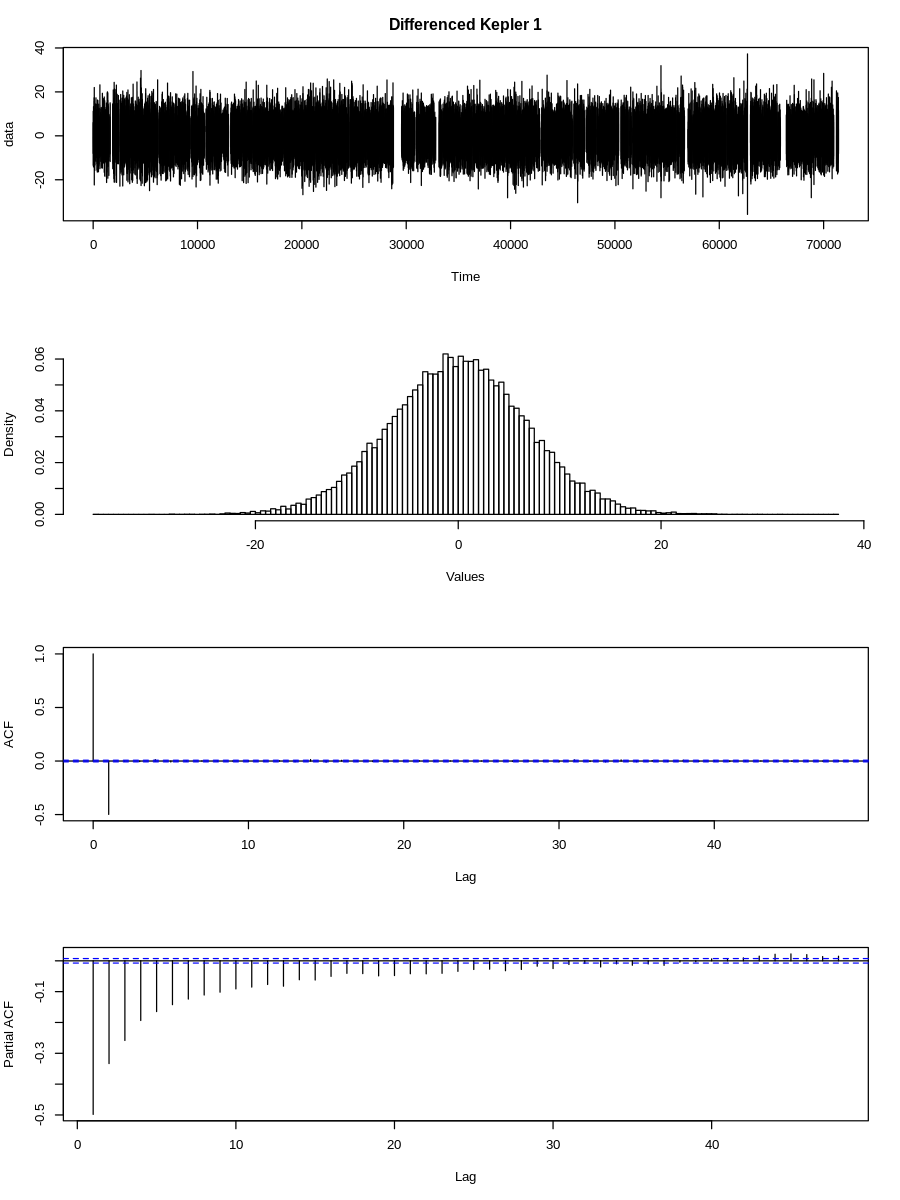

In [22]:
Kepler1.diff <- diff(Kepler1, differences=1)
par(mfrow = c(2,1))
Presentation(Kepler1, 'Kepler 1')
Presentation(Kepler1.diff, 'Differenced Kepler 1')

In this case we see that the differencing procedure over a stationary well distributed time-series performs badly: it broadens the distribution and creates relevant autocorrelation which was not present before.

However the differenced time series has a shifted mean around zero so it is worth trying the model.

We deduce that `d=0` is a better choice for the fitting parameter.

##### ARIMA

Since there is no autocorrelation, we try the fitting with `ARMA(p=2,q=2)`.

In [23]:
Kepler1.arima <- Arima(Kepler1, order=c(2,0,2))
print(summary(Kepler1.arima))

Series: Kepler1 
ARIMA(2,0,2) with non-zero mean 

Coefficients:
         ar1     ar2      ma1      ma2     mean
      0.0720  0.9155  -0.0562  -0.8950  -0.1531
s.e.  0.0766  0.0762   0.0776   0.0757   0.0720

sigma^2 estimated as 23.55:  log likelihood=-180202.1
AIC=360416.2   AICc=360416.2   BIC=360471.3

Training set error measures:
                      ME     RMSE      MAE      MPE    MAPE      MASE
Training set 0.002019792 4.852666 3.835685 105.6118 157.686 0.7116986
                    ACF1
Training set 0.001881846
                      ME     RMSE      MAE      MPE    MAPE      MASE
Training set 0.002019792 4.852666 3.835685 105.6118 157.686 0.7116986
                    ACF1
Training set 0.001881846


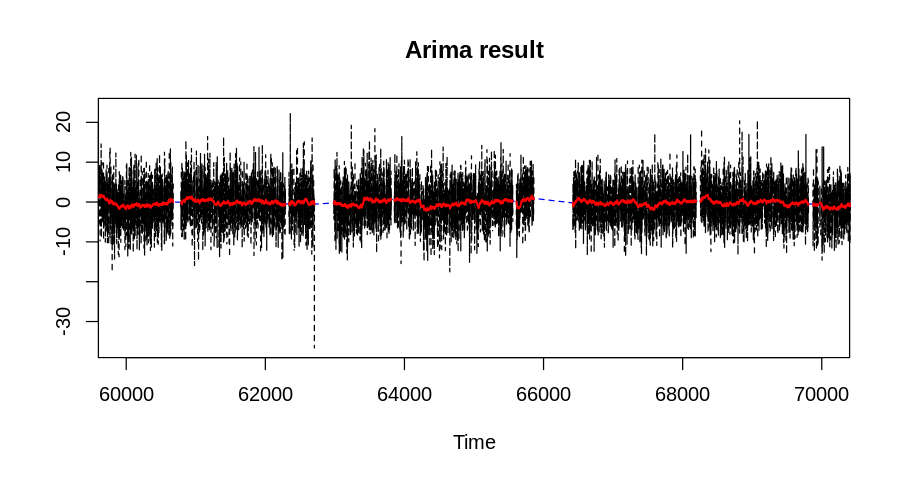

In [24]:
options(repr.plot.width = 7.5, repr.plot.height = 4)
plot(Kepler1, type='l', xlab='Time', ylab="", lty=2, main='Arima result', xlim=c(60000,70000))
lines(na.kalman(Kepler1.arima$fitted), col="blue", lwd=1, lty=2)
lines(Kepler1.arima$fitted, col="red", lwd=1.55)

InterQuartile Range =  6.401672 



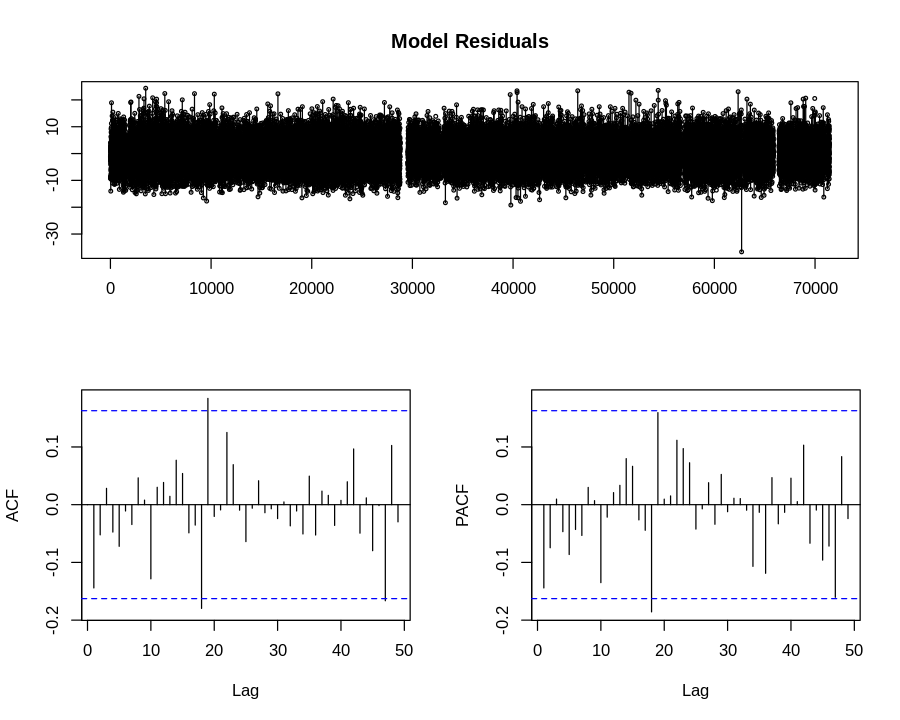

In [25]:
options(repr.plot.width = 7.5, repr.plot.height = 6)
resid1.arima <- residuals(Kepler1.arima)
tsdisplay(resid1.arima, main='Model Residuals')

#Interquantile Range
cat('InterQuartile Range = ', IQR(resid1.arima, na.rm=TRUE), '\n\n')

##### Auto ARIMA

In [26]:
Kepler1.autoArima <- auto.arima(Kepler1, stepwise=FALSE, parallel=TRUE, stationary=TRUE)
print(summary(Kepler1.autoArima))

Series: Kepler1 
ARIMA(0,0,1) with zero mean 

Coefficients:
         ma1
      0.0390
s.e.  0.0041

sigma^2 estimated as 20.29:  log likelihood=-180903.6
AIC=361811.3   AICc=361811.3   BIC=361829.6

Training set error measures:
                     ME     RMSE      MAE      MPE     MAPE      MASE
Training set -0.1467892 4.911407 3.888217 101.1802 112.5717 0.7214456
                    ACF1
Training set 0.000515327
                     ME     RMSE      MAE      MPE     MAPE      MASE
Training set -0.1467892 4.911407 3.888217 101.1802 112.5717 0.7214456
                    ACF1
Training set 0.000515327


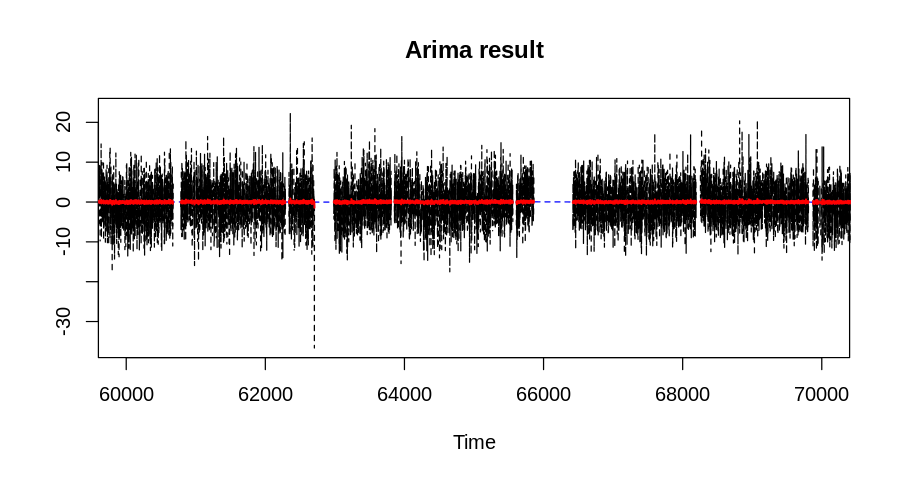

In [27]:
options(repr.plot.width = 7.5, repr.plot.height = 4)
plot(Kepler1, type='l', xlab='Time', ylab="", lty=2, main='Arima result', xlim=c(60000,70000))
lines(na.kalman(Kepler1.autoArima$fitted), col="blue", lwd=1, lty=2)
lines(Kepler1.autoArima$fitted, col="red", lwd=1.55)

InterQuartile Range =  6.490073 



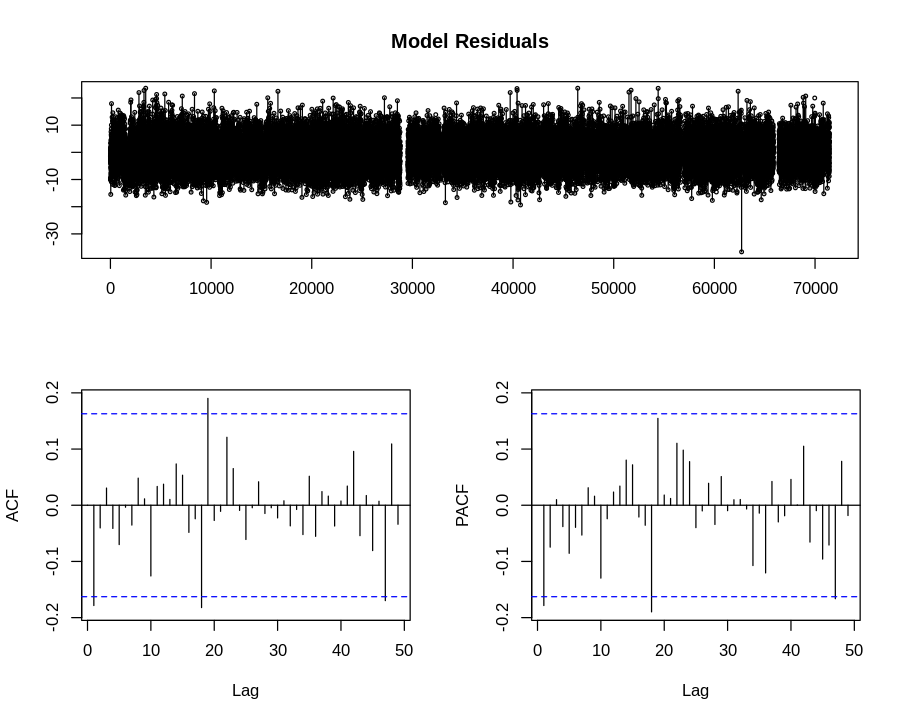

In [28]:
options(repr.plot.width = 7.5, repr.plot.height = 6)
resid1 <- residuals(Kepler1.autoArima)
tsdisplay(resid1, main='Model Residuals')

#Interquatile Range
cat('InterQuartile Range = ', IQR(resid1, na.rm=TRUE), '\n\n')

The `auto-arima (0,0,1)` result performs similarly to our model `(2,0,2)`. There is a very little increment in the `IQR` for the `(0,0,1)` case and it also shows a slight autocorrelation on the first lag which is not present in the `(2,0,2)` model.

However, the autocorrelation distribution stays quite flat in both cases with a little improvement in `(2,0,2)`.

We still have a preference for the `AIC` minimizer parameter model `(0,0,1)` and used that one for the testing section.

Here we emphasize that `ARIMA` fit confirms the lack of a significant signal.

##### Residuals autocorrelation tests

In [29]:
# Ljung-Box test
cat('\n ----> Kepler 1 Arima (0,0,1)')
print(Box.test(resid1, lag=1, type='Ljung'))

# Durbin-Watson test
print(dwtest(resid1~time1))


 ----> Kepler 1 Arima (0,0,1)
	Box-Ljung test

data:  resid1
X-squared = 0.015958, df = 1, p-value = 0.8995


	Durbin-Watson test

data:  resid1 ~ time1
DW = 1.9898, p-value = 0.1059
alternative hypothesis: true autocorrelation is greater than 0



##### Residuals stationarity test

In [30]:
# augmented Dickey-Fuller Test -> stationarity
cat('\n ----> Kepler 1 Arima (0,0,1)')
print(adf.test(na.kalman(resid1), alternative='stationary'), prefix="[Imputing NA]  ")


 ----> Kepler 1 Arima (0,0,1)

Warning message in adf.test(na.kalman(resid1), alternative = "stationary"):
“p-value smaller than printed p-value”


[Imputing NA]  Augmented Dickey-Fuller Test

data:  na.kalman(resid1)
Dickey-Fuller = -24.858, Lag order = 41, p-value = 0.01
alternative hypothesis: stationary



### Kepler 2

##### Differencing

The Kepler 2 time-series presents a visible trend therefore it seemed reasonable to check the results of a first order differencing in order to obtain a better fitting with the ARIMA method.

------> Kepler 2 
Length = 71427 
NA percentage = 0.2883783 
------> Differenced Kepler 2 


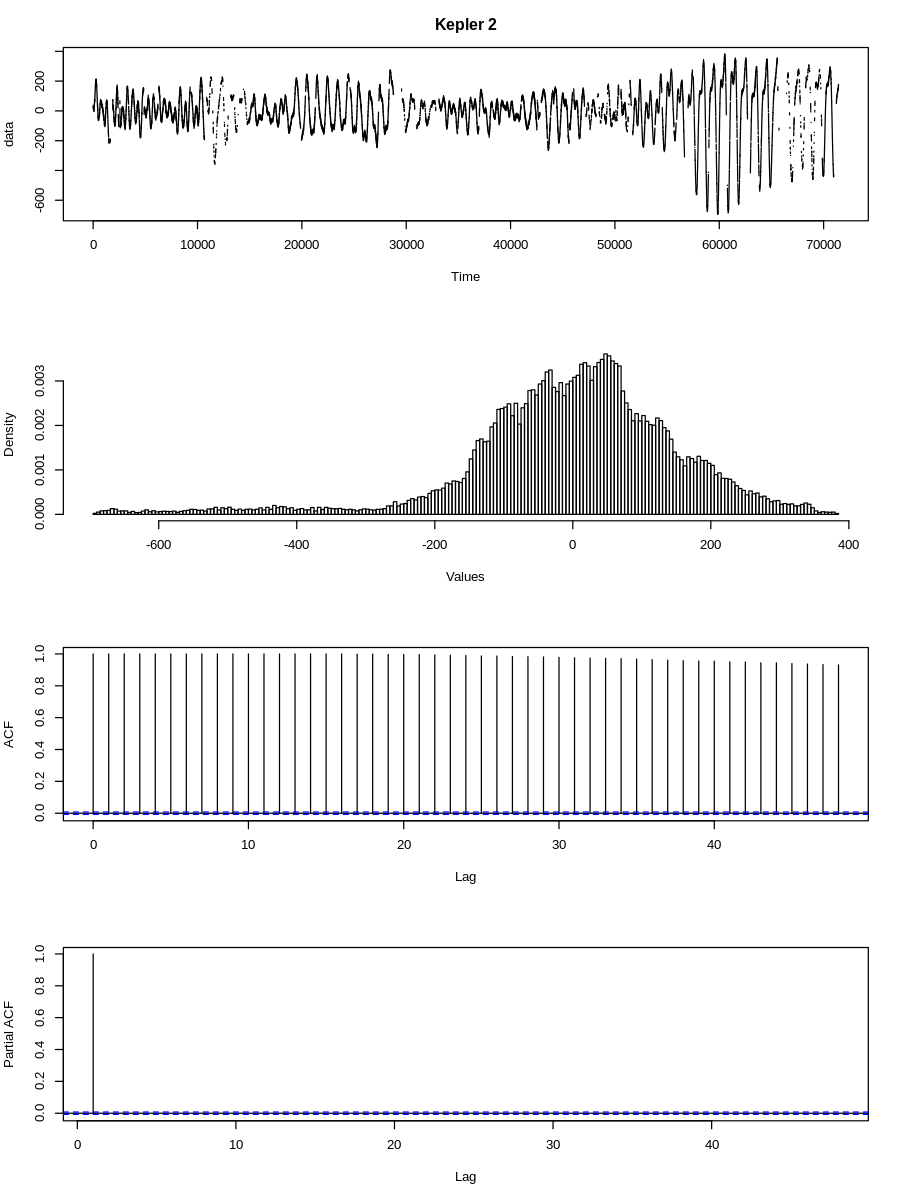

Length = 71426 
NA percentage = 0.3590289 


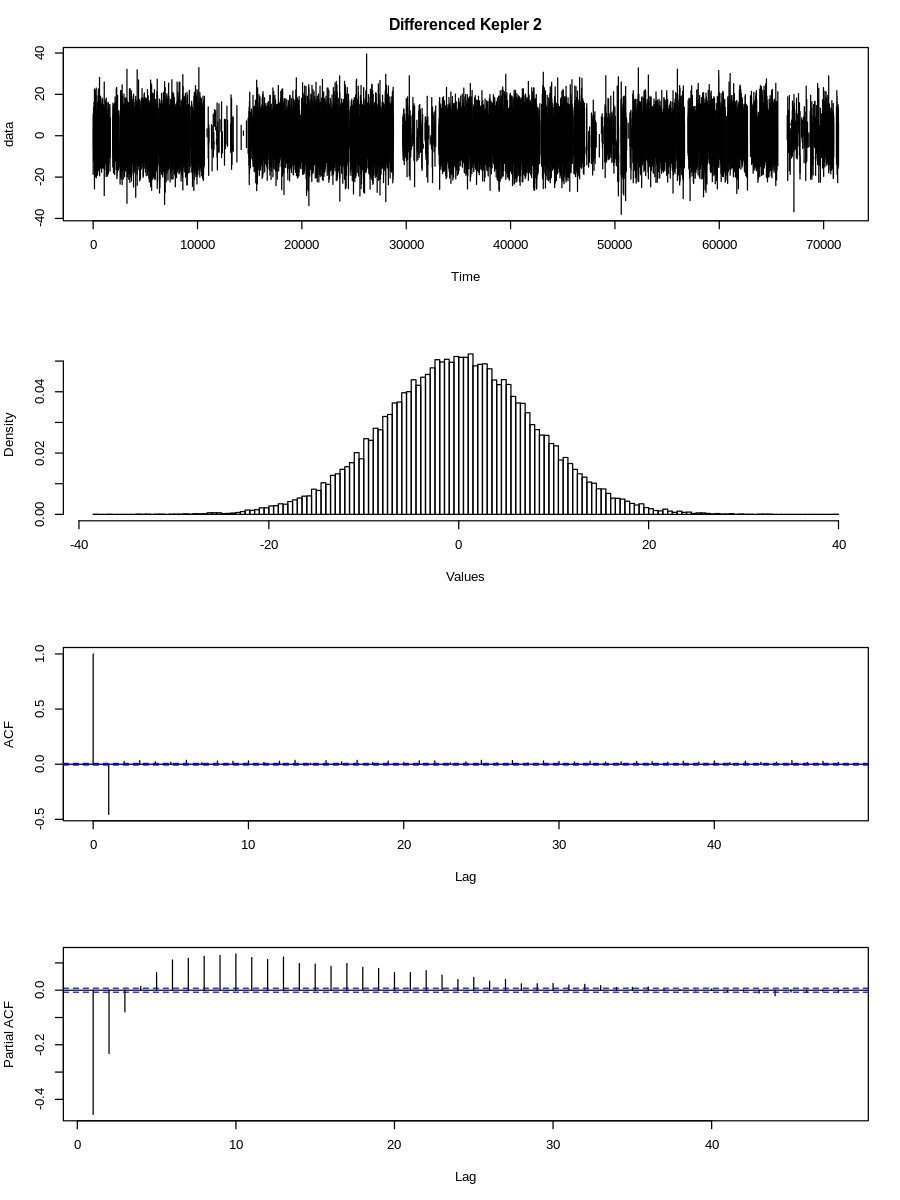

In [31]:
Kepler2.diff <- diff(Kepler2, differences=1)
par(mfrow = c(2,1))
Presentation(Kepler2, 'Kepler 2')
Presentation(Kepler2.diff, 'Differenced Kepler 2')

As we can see from the latter results, the differenced time series shows better stationarity and therefore it is more suitable for `ARIMA`. The distribution of the data has a defined bell shape and the autocorrelation is also damped.

We deduce that `d=1` is a better choice fot the fitting parameter.

##### ARIMA

Our first try is to set the MA lag value `q=1`, since the autocorrelation function shows a peak at the first lag.

In [32]:
Kepler2.arima <- Arima(Kepler2, order=c(0,1,1))
print(summary(Kepler2.arima))

Series: Kepler2 
ARIMA(0,1,1) 

Coefficients:
          ma1
      -0.4729
s.e.   0.0031

sigma^2 estimated as 49.36:  log likelihood=-172657
AIC=345318   AICc=345318.1   BIC=345336.4

Training set error measures:
                     ME     RMSE     MAE       MPE     MAPE     MASE
Training set -0.0123254 7.025258 5.52407 -2.376707 38.58173 0.876943
                    ACF1
Training set -0.09475291
                     ME     RMSE     MAE       MPE     MAPE     MASE
Training set -0.0123254 7.025258 5.52407 -2.376707 38.58173 0.876943
                    ACF1
Training set -0.09475291


Warning message in StructTS(data, ...):
“possible convergence problem: 'optim' gave code = 52 and message ‘ERROR: ABNORMAL_TERMINATION_IN_LNSRCH’”

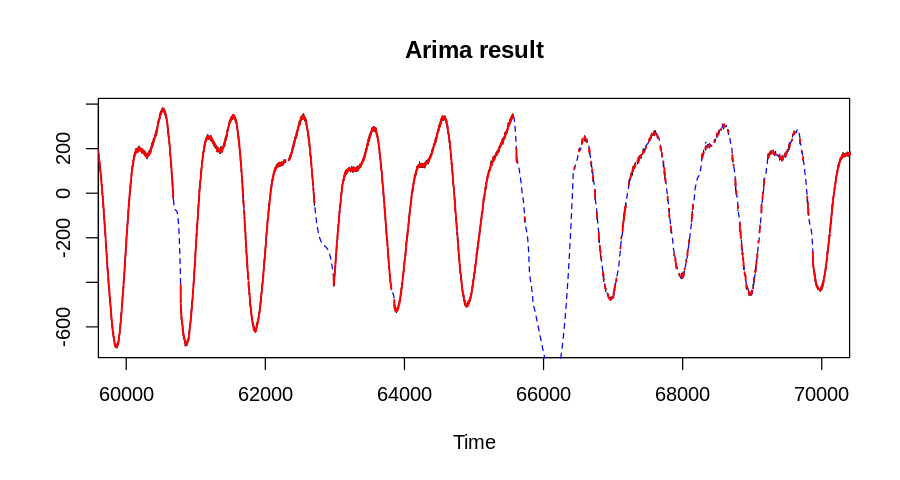

In [33]:
options(repr.plot.width = 7.5, repr.plot.height = 4)
plot(Kepler2, type='l', xlab='Time', ylab="", lty=2, main='Arima result', xlim=c(60000,70000))
lines(na.kalman(Kepler2.arima$fitted), col="blue", lwd=1, lty=2)
lines(Kepler2.arima$fitted, col="red", lwd=1.55)


InterQuartile Range =  9.203676 



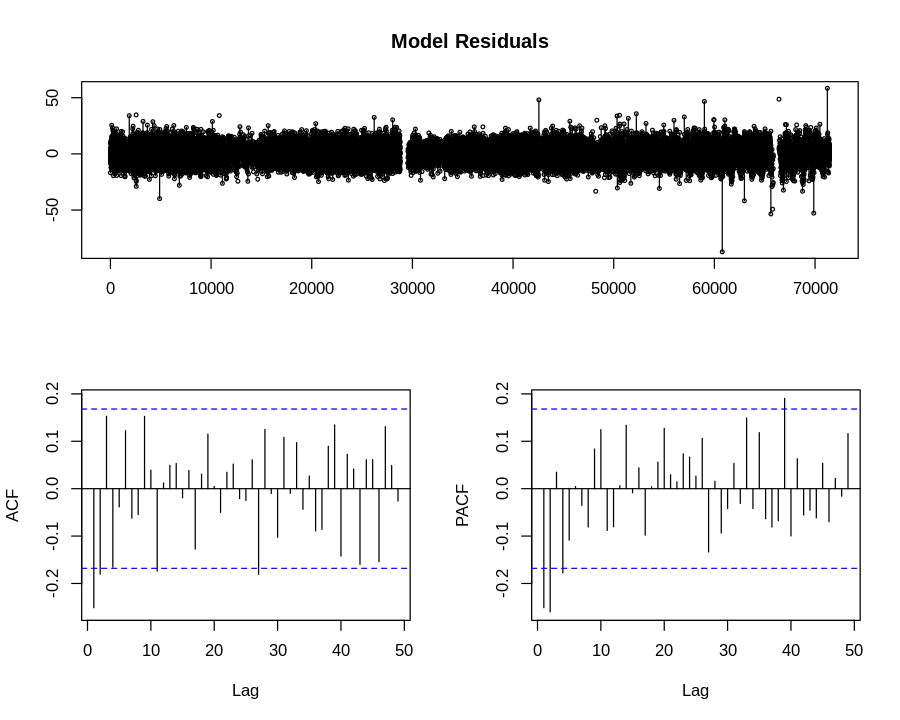

In [34]:
options(repr.plot.width = 7.5, repr.plot.height = 6)
resid2.arima <- residuals(Kepler2.arima)
tsdisplay(resid2.arima, main='Model Residuals')

#Interquantile Range
cat('InterQuartile Range = ', IQR(resid2.arima, na.rm=TRUE), '\n\n')

##### Auto ARIMA

In [35]:
Kepler2.autoArima <- auto.arima(Kepler2, stepwise=FALSE, parallel=TRUE)
print(summary(Kepler2.autoArima))

Series: Kepler2 
ARIMA(0,0,5) with zero mean 

Coefficients:
         ma1     ma2     ma3     ma4     ma5
      1.8483  2.3902  2.2257  1.4716  0.5993
s.e.  0.0053  0.0086  0.0077  0.0051  0.0037

sigma^2 estimated as 349.5:  log likelihood=-236025.8
AIC=472063.5   AICc=472063.5   BIC=472118.6

Training set error measures:
                      ME     RMSE      MAE      MPE     MAPE     MASE      ACF1
Training set -0.06027983 22.16221 16.85535 31.42486 99.89575 2.675777 0.3199945
                      ME     RMSE      MAE      MPE     MAPE     MASE      ACF1
Training set -0.06027983 22.16221 16.85535 31.42486 99.89575 2.675777 0.3199945


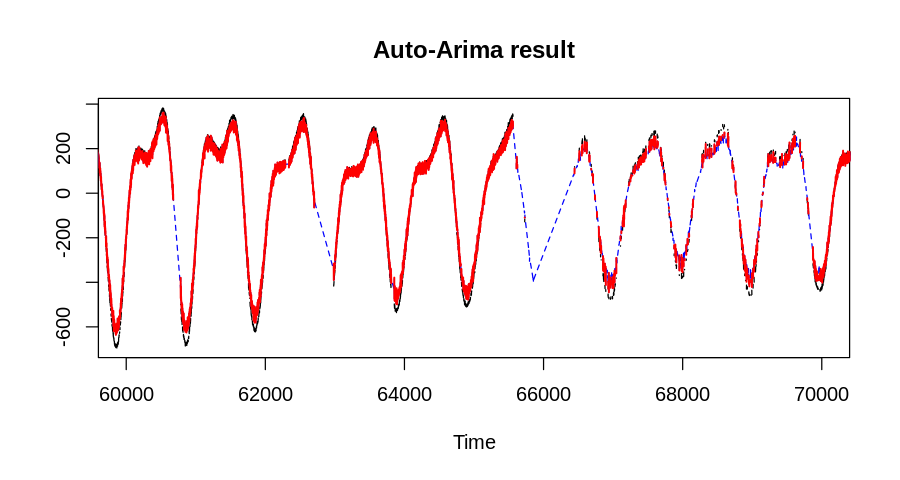

In [36]:
options(repr.plot.width = 7.5, repr.plot.height = 4)
plot(Kepler2, type='l', xlab='Time', ylab="", lty=2, main='Auto-Arima result', xlim=c(60000,70000))
lines(na.kalman(Kepler2.autoArima$fitted), col="blue", lwd=1, lty=2)
lines(Kepler2.autoArima$fitted, col="red", lwd=1.55)

InterQuartile Range =  26.78761 



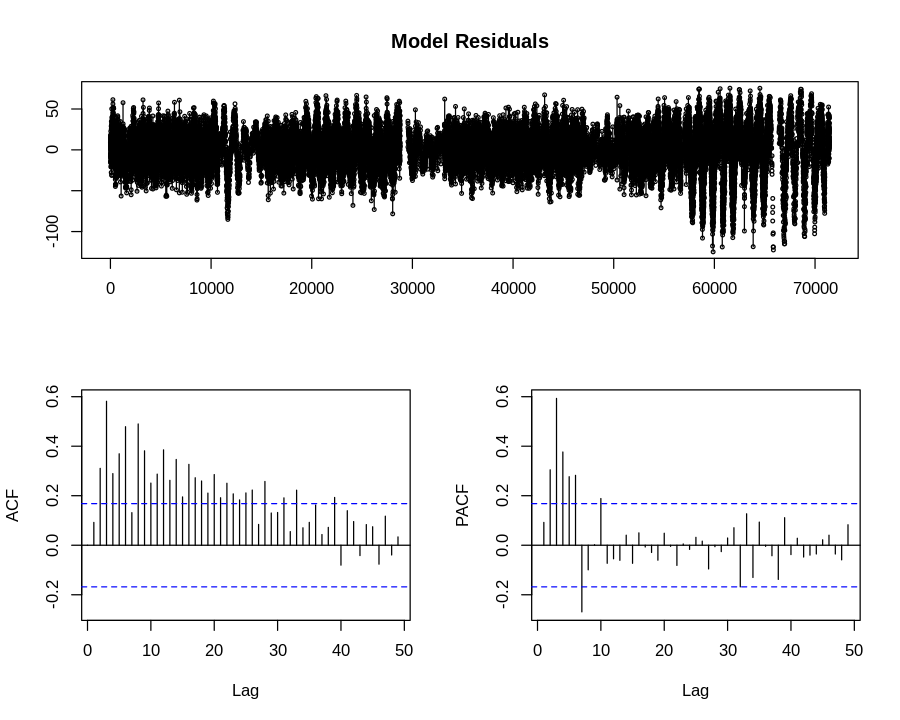

In [37]:
options(repr.plot.width = 7.5, repr.plot.height = 6)
resid2 <- residuals(Kepler2.autoArima)
tsdisplay(resid2, main='Model Residuals')

#Interquatile Range
cat('InterQuartile Range = ', IQR(resid2, na.rm=TRUE), '\n\n')

The performance of this automatic modeling technique is fairly poor and we suppose the problem lies in the choice of `d=0`: it is only reasonable that differencing must be implemented in this star, which, as we have seen, shows high-amplitude and quasi-periodic variations. We therefore force the model to work with `d=1` and see if better results are found.

In [38]:
Kepler2.autoArima <- auto.arima(Kepler2, d=1, stepwise=FALSE, parallel=TRUE)
print(summary(Kepler2.autoArima))

Series: Kepler2 
ARIMA(0,1,5) 

Coefficients:
          ma1     ma2     ma3     ma4     ma5
      -0.6170  0.0471  0.0482  0.0321  0.1130
s.e.   0.0047  0.0057  0.0054  0.0056  0.0046

sigma^2 estimated as 33.13:  log likelihood=-171199.8
AIC=342411.7   AICc=342411.7   BIC=342466.8

Training set error measures:
                      ME     RMSE      MAE       MPE     MAPE      MASE
Training set -0.01040109 6.823327 5.379037 -1.835626 40.56571 0.8539191
                     ACF1
Training set -0.004503098
                      ME     RMSE      MAE       MPE     MAPE      MASE
Training set -0.01040109 6.823327 5.379037 -1.835626 40.56571 0.8539191
                     ACF1
Training set -0.004503098


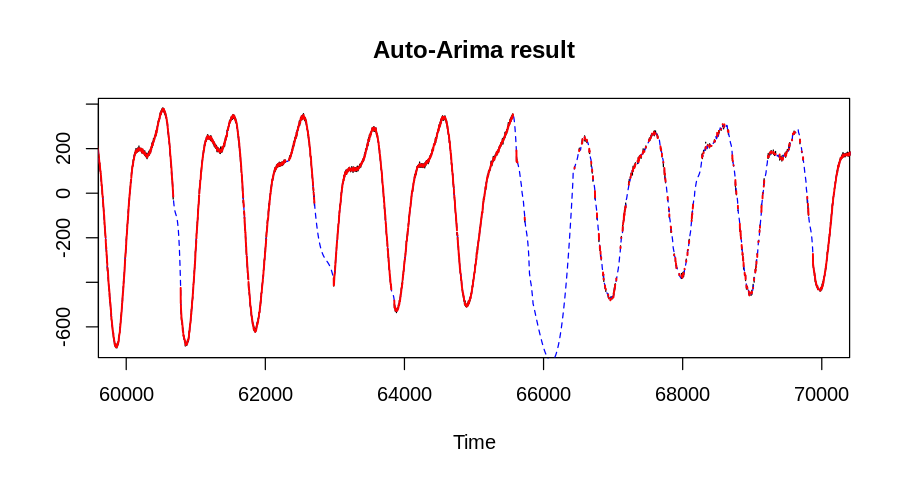

In [39]:
options(repr.plot.width = 7.5, repr.plot.height = 4)
plot(Kepler2, type='l', xlab='Time', ylab="", lty=2, main='Auto-Arima result', xlim=c(60000,70000))
lines(na.kalman(Kepler2.autoArima$fitted), col="blue", lwd=1, lty=2)
lines(Kepler2.autoArima$fitted, col="red", lwd=1.55)

InterQuartile Range =  8.937064 



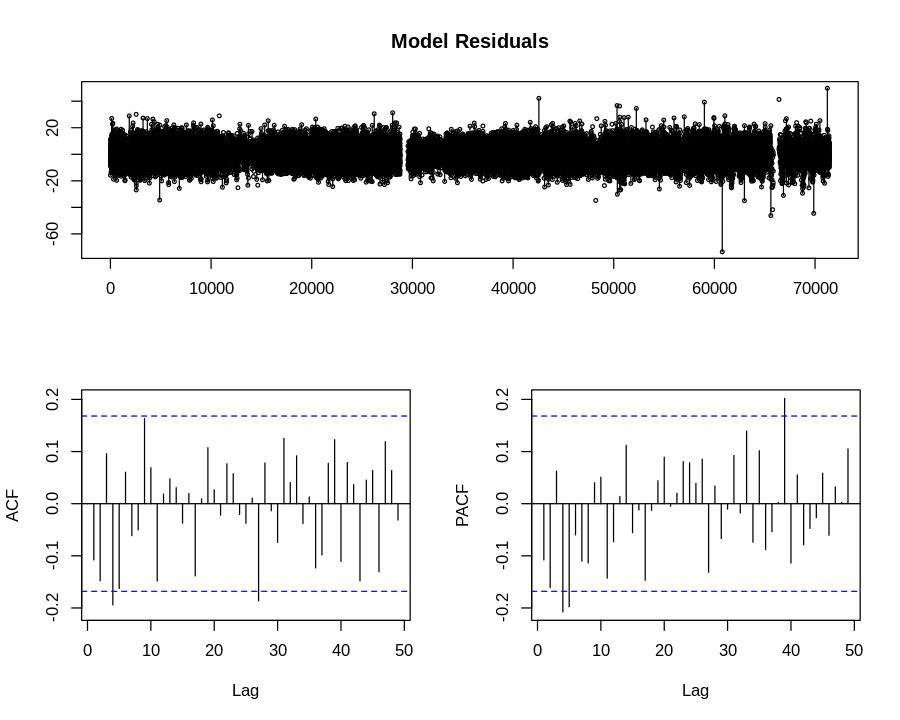

In [40]:
options(repr.plot.width = 7.5, repr.plot.height = 6)
resid2 <- residuals(Kepler2.autoArima)
tsdisplay(resid2, main='Model Residuals')

#Interquatile Range
cat('InterQuartile Range = ', IQR(resid2, na.rm=TRUE), '\n\n')

`ARIMA (0,1,5)` is a better estimation of Kepler 2 time series. The first try of `auto.arima` gives us `d=0`, but without the differentiation the algorithm performs worse in catching the quasi-periodic variation; this fact is also highlighted by the `IQR` values, and the plots of `ACF` and `PACF`. The fitted values of the time series are in great agreement with the original data: hence, this method can capture the signal in Kepler 2.

The tests in the following sections are done on the model `ARIMA (0,1,5)`.

##### Residuals autocorrelation tests

In [41]:
# Ljung-Box test
cat('\n ----> Kepler 2 Auto-Arima (0,1,5)')
print(Box.test(resid2, lag=1, type='Ljung'))

# Durbin-Watson test
print(dwtest(resid2~time2))


 ----> Kepler 2 Auto-Arima (0,1,5)
	Box-Ljung test

data:  resid2
X-squared = 1.0308, df = 1, p-value = 0.31


	Durbin-Watson test

data:  resid2 ~ time2
DW = 2.001, p-value = 0.5453
alternative hypothesis: true autocorrelation is greater than 0



##### Residuals stationarity test

In [42]:
# augmented Dickey-Fuller Test -> stationarity
cat('\n ----> Kepler 2 Auto-Arima (0,1,5)')
print(adf.test(na.kalman(resid2), alternative='stationary'), prefix="[Imputing NA]  ")


 ----> Kepler 2 Auto-Arima (0,1,5)

Warning message in adf.test(na.kalman(resid2), alternative = "stationary"):
“p-value smaller than printed p-value”


[Imputing NA]  Augmented Dickey-Fuller Test

data:  na.kalman(resid2)
Dickey-Fuller = -9.3564, Lag order = 41, p-value = 0.01
alternative hypothesis: stationary



## d) Periodicity search
**Try the functions in CRAN's RobPer as well as R's Fourier spec.pgram. Any planets?**

After performing the ARIMA test in all its variations, we can now employ some R tools to perform a periodicity search over the two time series and understand if there are conclusive signs of the presence of any exoplanet. In general, a spectral analysis searches for periodical variations in a spectrum, which could be due to the shielding effect when the planet happens to revolve in front of the star, with respect to the direction of sight. 

Firstly, we need to separate the noise from signal and then make a power spectra analysis on the dataset; we do so by combining three different methods:
* a Fourier power spectrum based on the interpolated lightcurves;
* an unweighted Stellingwerf phase dispersion minimization (PDM) periodogram;
* a Lomb-Scargle periodogram computed on the original datasets, which is supposed to be the best performing method as far as suppressing the noise and individuating signals.

Among these tests, the Lomb-Scargle is known to be the most effective. In fact, it employs a least squares fit of sinusoids to data samples while managing to mitigate problems due to periodic noise in long gapped records, so it really suits our needs.

In [43]:
Planet.detector <- function(dataset){
    # make a power spectra analysis on the dataset; it combine three different method: 
    #   - Fourier power spectrum based on the interpolated lightcurve;
    #   - an unweighted Stellingwerf phase dispersion minimization periodogram
    #   - a Lomb-Scargle periodogram based on the original lightcurve;
    
    impute  <- na.kalman(dataset)
    temp    <- cbind(1:length(dataset), dataset)
    irreg   <- temp[!is.na(temp[,2]),]
    PDM_per <- seq(from=1, to=10001, length.out=1000)
    PDM     <- RobPer(irreg, weighting=FALSE,  regression='L2', model='step', steps=10, periods=PDM_per)

    #plotting
    par(mfrow=c(3,1)) ;  par(mar=c(5,4,1,2))

    spec.pgram(impute, xlim=c(0,0.005), spans=5, taper=0.0, main='', ylab='Fourier', sub='')

    PDM_freq <- 1/PDM_per
    plot(PDM_freq, PDM, type='l', xlab='frequency', ylab='PDM', xlim=c(0,0.005))

    lsp(dataset, from=0.00, to=0.005, ylab='Lomb-Scargle', main='')

}


Noise.suppression <- function(dataset,n=10){
    # detect the noise and separate noise from signal
    
    Kepler_impute <- na.kalman(dataset)
    Kepler_wavdat <- Kepler_impute[1:2^16]
    Kepler_dwt <-  dwt(Kepler_wavdat,n.levels=10)

    Kepler_wd <- wd(Kepler_wavdat, filter.number=n)
    Kepler_wdth <- threshold(Kepler_wd, policy='universal')
    Kepler_thresh <- wr(Kepler_wdth)
    par(mfrow=c(2,1))  ;  par(mar=c(4,4,1,1))
    Title <- str(dataset)
    plot(Kepler_wavdat, type='l', xlim=c(30000,40000))
    plot(Kepler_thresh, type='l', xlim=c(30000,40000))
}

### Kepler 1

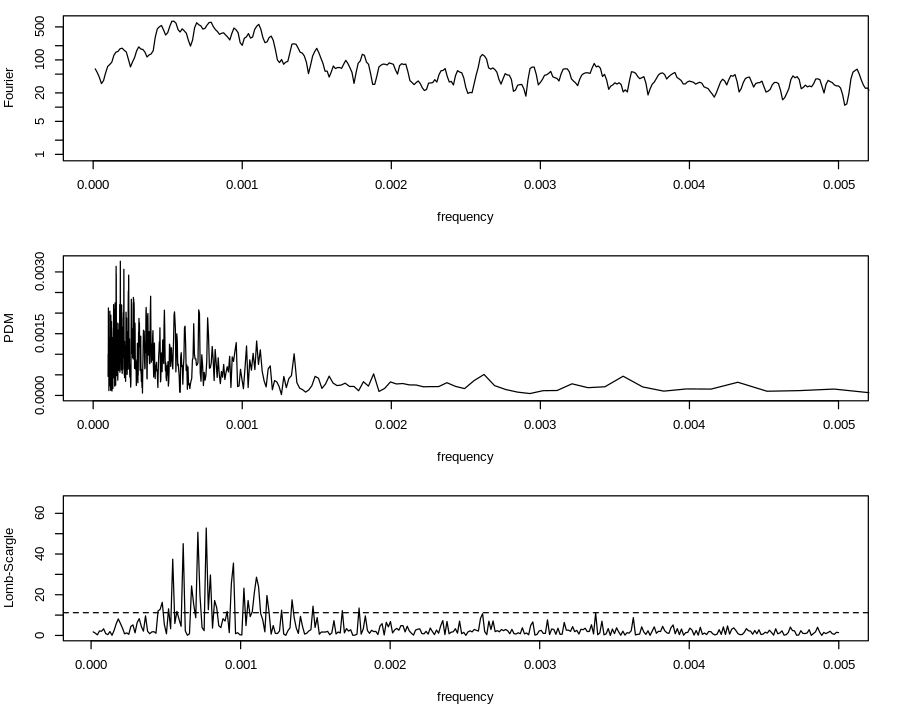

In [44]:
Planet.detector(Kepler1)

Those three methods applied to Kepler 1 do not show a clear peak at a certain frequency.

 num [1:71427] -1.35 -1.53 -9.5 -3.48 NA ...


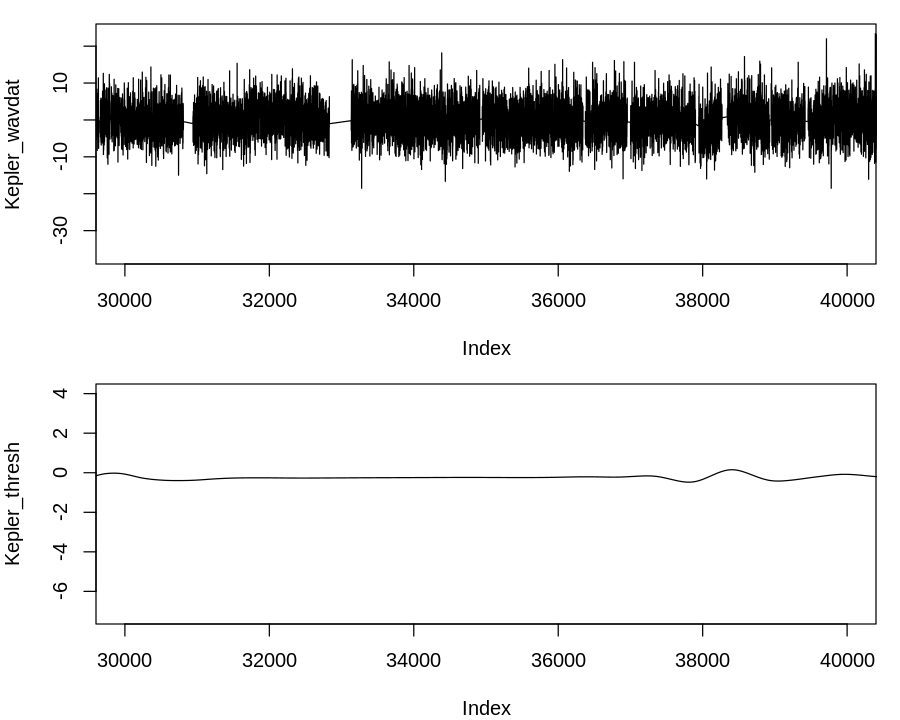

In [45]:
Noise.suppression(Kepler1)

Kepler 1 shows a flat distribution around 0 and the tiny bump right after index 38,000 does not appear to be significant. This is yet another indication that this star might be characterized by mere noise, which is something several elements have been suggesting throughout this analysis.

This seems to be suggesting the absence of planets orbiting around this star, confirming what we have seen above.

### Kepler 2

Warning message in StructTS(data, ...):
“possible convergence problem: 'optim' gave code = 52 and message ‘ERROR: ABNORMAL_TERMINATION_IN_LNSRCH’”

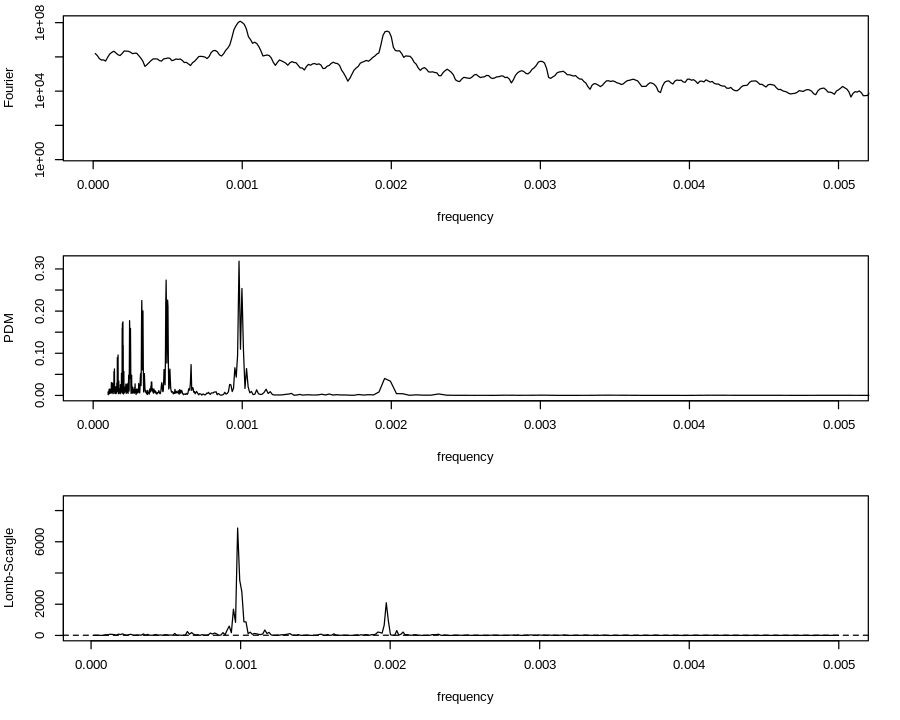

In [46]:
Planet.detector(Kepler2)

These results from Kepler 2 are further proof of the effectiveness of the Lomb-Scargle periodogram, which shows two well-defined peaks at frequencies $\nu_1 \approx 0.001$ and $\nu_2 \approx 0.002$. Compared to this method, the PDM has issues in getting rid of noisy effects at low frequencies but nevertheless is able to show these two peaks at cited $\nu$; the Fourier spectrum analysis, on the other hand, presents a very bumpy trend which makes it hard to distinguish meaningful results if we look at this without comparison with other methods; however, if we compare it with the Lomb-Scargle, we are able to distinguish the two peaks also in this pattern.

This leads to the conclusion that two planets are orbiting around this star. 

Warning message in StructTS(data, ...):
“possible convergence problem: 'optim' gave code = 52 and message ‘ERROR: ABNORMAL_TERMINATION_IN_LNSRCH’”

 num [1:71427] 38.4 19.7 19.1 27.2 25.7 ...


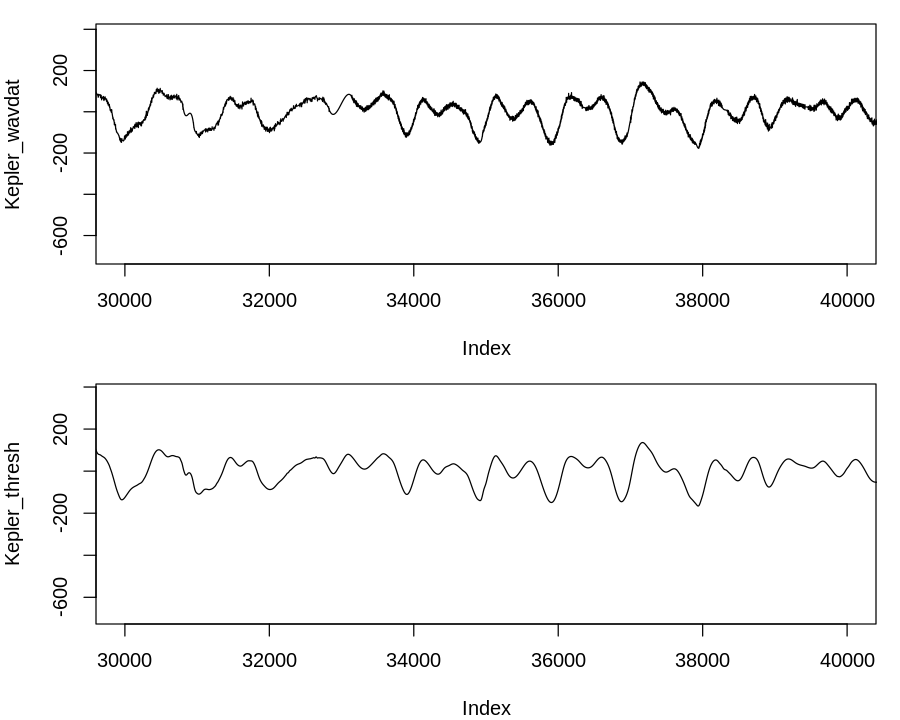

In [47]:
Noise.suppression(Kepler2)

The noise supression performed on Kepler 2 is presented above. We can compare the two signals (before and after the noise suppression) and conclude that Kepler 2 is a significant dataset that is affected by some noise which does not compromise the data. All the analyses performed in this notebook over this specific dataset are consistent.

## Conclusions

Over this study, we have managed to employ a variety of statistical tools and methodologies to analyze time series in Astronomy, in particular related to light curves from two stars for the Kepler mission.

These tools, implemented in a versatile programming language such as R, were used to study the properties of the time series and also to deal with common issues they present (missing values, presence of noise, ...). The smoothing procedure section unveils different application purposes depending on the methods used. Some of them (`LOESS` and `LOCFIT`) were employed aiming for a better prediction of the missing data while others (`COBS`) show a more versatile applicability to highlight macroscopic time series trends.

The application of autoregressive models together with `kalman` imputation shows very good results especially in the Kepler 2 dataset. As a remarkable point to underline in the followed procedure, we have to stress that the stationary hypothesis is fundamental for good fitting using those methods and therefore the differencing step was crucial.

Specifically, our final goal was to understand whether there are exoplanets orbiting around the stars. Kepler 1 shows no definite signs that might lead to this conclusion, also because the signal is much weaker and the noise appears to be dominant. A possibility would be to implement some sort of filtering procedure to exclude frequencies at various ranges and see if significant patterns emerge at any point.

On the other hand, we have been able to identify two probable exoplanets orbiting around the Kepler 2 star.